<a href="https://colab.research.google.com/github/alexandreasantos/Ciencia-de-Dados-e-Analytics/blob/main/Machine_Learning_%26_Analytics_(40530010056_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Nome:** Alexandre Alves dos Santos de Campos

**Matrícula:** 2025000

**Dataset:** finance.yahoo.com [https://finance.yahoo.com/]

# Descrição do Problema

O mercado financeiro é caracterizado por sua elevada volatilidade e pela dificuldade histórica em prever seus movimentos de forma consistente. Traders e investidores utilizam uma grande variedade de indicadores técnicos e estatísticos, mas muitas vezes esses métodos não conseguem antecipar mudanças de tendência de forma eficaz.

Neste contexto, surge a seguinte questão:
**Será possível, através de modelos de regressão aplicados a séries temporais, identificar padrões que ajudem a predizer a direção futura do mercado?**

## Objetivo

Explorar a aplicação de modelos de regressão sobre dados de ativos locais e globais, avaliando se a variação dos retornos e das correlações entre eles pode ser utilizada para estimar **tendências futuras** no Mini Dólar (DOLFUT).

## Hipótese Central

A hipótese que guia este trabalho é:  
**"A dificuldade de prever o movimento do mercado pode ser parcialmente reduzida utilizando regressão para estimar tendências a partir de variáveis locais e globais."**

Assim, o objetivo é verificar se regressões bem definidas podem contribuir para a transformação de dados históricos em **sinais operacionais mais robustos**, fornecendo uma vantagem preditiva em cenários de tomada de decisão.

## Restrições e Condições dos Dados

- **Fonte dos dados:** Yahoo Finance
- **Período:** de 01/01/2023 a 31/12/2024  
- **Frequência:** dados diários (não foi possível coletar intradiários nesta etapa)  
- **Limitações:**  
  - Os contratos futuros do DOLFUT não estão diretamente disponíveis no Yahoo Finance, sendo utilizado proxie USDBRL=X para DOLFUT.  
  - Diferença de liquidez e horário entre os mercados locais (B3) e globais (EUA, moedas, commodities).  
  - Eventuais falhas de coleta e valores ausentes foram tratados com remoção ou imputação conservadora.  

## Descrição do Dataset

Cada ativo possui atributos padrão de séries financeiras:  

- **Preços OHLC:** Abertura (`Open`), Máxima (`High`), Mínima (`Low`), Fechamento (`Close`)  
- **Fechamento Ajustado (`Adj Close`)**: corrigido para dividendos e splits  
- **Volume Financeiro (`Volume`)**  

Além disso, foram construídos **atributos derivados** para enriquecer o dataset:  
- Retornos diários (`pct_change`)  
- Índices sintéticos (Local e Global), compostos por médias ponderadas dos ativos selecionados  
- Transformações estatísticas (normalização, padronização, médias móveis, etc.) aplicadas para uso nos modelos de regressão



## Detecção e Tratamento de Outliers

Durante a preparação dos dados foi avaliada a presença de outliers.  
No contexto de séries financeiras, valores extremos muitas vezes não representam erros, mas sim **eventos reais do mercado** (ex.: decisões de bancos centrais, choques econômicos, crises políticas).

### Decisão:
- Não foram removidos outliers nesta fase, pois eles fazem parte da dinâmica natural do mercado.
- Os modelos de machine learning deverão aprender a lidar com esses eventos extremos dentro do processo de treinamento.


## Balanceamento de Dados

No presente MVP, o problema foi inicialmente tratado como **regressão de retornos**.  
Nesse caso, técnicas clássicas de balanceamento (como SMOTE ou oversampling) **não se aplicam diretamente**, já que a variável-alvo é contínua.  
O mercado naturalmente apresenta distribuições assimétricas, com muitos retornos próximos de zero e eventos raros (caudas).  
Para lidar com isso, foram utilizados:

- **Funções de perda robustas** (ex.: Huber), menos sensíveis a outliers.  
- **Pesos amostrais proporcionais à magnitude dos retornos**, para dar mais importância a grandes movimentos.  

Se o problema for reformulado como **classificação direcional** (ex.: alta/baixa ou compra/venda/hold),  
o desbalanceamento entre classes passa a ser relevante. Nesse cenário, algumas abordagens possíveis são:

- Definição de uma **zona morta** em torno de 0 (retornos muito pequenos → ignorados).  
- Uso de **class_weight='balanced'** ou pesos customizados no treinamento.  
- Ajuste do **threshold de decisão** (probabilidade ótima via validação, ex.: maximizar F1).  

### Boas Práticas Adotadas
- **Sem vazamento temporal**: splits respeitaram a ordem da série.  
- **Cross-validation temporal** (TimeSeriesSplit) no GBM para avaliar robustez.  
- **Baseline comparativo** (persistência) para medir ganhos reais do modelo.  

> Conclusão: No formato **regressão**, o balanceamento foi tratado com pesos e perdas robustas.  
> Já para a versão **classificação**, o desbalanceamento deve ser explicitamente endereçado com técnicas adequadas.

# Importação de Bibliotecas e Configurações Iniciais

## Objetivo
Nesta etapa são importadas as **principais bibliotecas** utilizadas no projeto e definidas as **configurações globais** que garantem reprodutibilidade e boa visualização dos resultados.  

### Principais grupos de bibliotecas

- **Manipulação e análise de dados**  
  `pandas`, `numpy`

- **Coleta de dados financeiros**  
  `yfinance`

- **Visualização gráfica**  
  `matplotlib`, `plotly`  
  *(o `seaborn` pode ser usado opcionalmente)*

- **Estatística e métricas**  
  `scipy.stats`, `sklearn.metrics`

- **Modelagem clássica de Machine Learning**  
  `sklearn` – modelos lineares, ensembles, busca em grade (*Grid Search*), *scalers* (normalização/padronização)

- **Modelos de séries temporais (opcionais)**  
  `statsmodels`, `prophet`

- **Boosting avançado (opcional)**  
  `xgboost`, `lightgbm`

- **Deep Learning (para LSTM e redes neurais)**  
  `tensorflow.keras` – `Sequential`, `LSTM`, `Dense`, `Dropout`, `Callbacks`

Além disso, são aplicadas **configurações de ambiente** para garantir **reprodutibilidade** dos experimentos (definição de sementes aleatórias, controle de avisos e logs do TensorFlow).

## Configurações Visuais

Para garantir gráficos claros e consistentes:

- **Fonte padrão:** `DejaVu Sans` para manter consistência visual.  
- **Formatação no Pandas:** exibição de valores numéricos com **duas casas decimais**.  
- **Estilo dos gráficos:** `seaborn-v0_8` como tema base para o `matplotlib`.  
- **Função auxiliar de formatação:**
  - `formatar_eixo_y_duas_casas()` – mantém o eixo Y com duas casas decimais (ex.: cotação do DOLFUT ≈ 5,43).  

Essas definições não alteram cálculos ou resultados, apenas **melhoram a legibilidade** de tabelas e gráficos ao longo da análise.


In [1]:
# ============================================================
# Imports
# ============================================================
import os, sys, random, warnings, time, platform, psutil
from typing import Optional, Dict,List, Tuple
from dataclasses import dataclass, asdict, is_dataclass
from __future__ import annotations

import numpy as np
import pandas as pd
import scipy.stats as stats

# Dados financeiros
import yfinance as yf

# Visualização
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter

# Evite seaborn se não precisar; deixe comentado para reduzir peso
# import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# sklearn
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix, roc_auc_score, r2_score, classification_report
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

# Modelos opcionais (instale se quiser usar)
try:
    from xgboost import XGBRegressor
except Exception as e:
    XGBRegressor = None
    print("XGBoost não instalado (ok).", str(e)[:80])

try:
    from lightgbm import LGBMRegressor
except Exception as e:
    LGBMRegressor = None
    print("LightGBM não instalado (ok).", str(e)[:80])

try:
    import statsmodels.api as sm
except Exception as e:
    sm = None
    print("Statsmodels não instalado (ok).", str(e)[:80])

try:
    from prophet import Prophet
except Exception as e:
    Prophet = None
    print("Prophet não instalado (ok).", str(e)[:80])

#Nomes padronizados
MODEL_GBR       = "GBM Regressão"
MODEL_GBC       = "GBM Classificação"
MODEL_LSTM_PX   = "LSTM (Preços)"
MODEL_LSTM_RET  = "LSTM (Retornos)"

@dataclass
class Metrics:
    rmse:  float | None = None
    mae:   float | None = None
    acc:   float | None = None
    prec:  float | None = None
    rec:   float | None = None
    f1:    float | None = None
    auc:   float | None = None
    # métricas financeiras
    ret:   float | None = None   # retorno total (decimal, ex.: 0.082 = 8.2%)
    sharpe:float | None = None
    mdd:   float | None = None
    cagr:  float | None = None

metrics_registry: dict[str, Metrics] = {
    MODEL_GBR:      Metrics(),
    MODEL_GBC:      Metrics(),
    MODEL_LSTM_PX:  Metrics(),
    MODEL_LSTM_RET: Metrics(),
}

def set_metrics(name: str, m: Metrics | None = None, **kwargs):
    cur = metrics_registry.get(name, Metrics())
    if m is not None:
        d = asdict(m) if is_dataclass(m) else dict(m)
        for k, v in d.items():
            setattr(cur, k, v)
    for k, v in kwargs.items():
        setattr(cur, k, v)
    metrics_registry[name] = cur

def _infer_periods(index) -> int:
    import pandas as pd, numpy as np
    if isinstance(index, pd.DatetimeIndex) and len(index) > 1:
        days = (index[-1] - index[0]).days
        if days > 0:
            return int(round(len(index) / (days/365.25)))
    return 252  # fallback diário

def _max_drawdown(equity) -> float:
    import pandas as pd
    eq = pd.Series(equity, dtype=float)
    return float((eq/eq.cummax() - 1.0).min())

def record_backtest_metrics(name: str, net_returns, equity=None, rf: float = 0.0):
    import numpy as np, pandas as pd
    r = pd.Series(net_returns, dtype=float).dropna()
    if r.empty:
        return
    periods = _infer_periods(r.index)
    eq = (1.0 + r).cumprod() if equity is None else (
        pd.Series(equity, dtype=float) / float(pd.Series(equity, dtype=float).iloc[0])
    )
    total_ret = float(eq.iloc[-1] - 1.0)
    ann_ret   = float(r.mean() * periods)
    vol       = float(r.std(ddof=1) * np.sqrt(periods))
    sharpe    = float((ann_ret - rf) / vol) if vol > 0 else float("nan")
    yrs = (r.index[-1]-r.index[0]).days/365.25 if isinstance(r.index, pd.DatetimeIndex) and len(r)>1 else len(r)/periods
    yrs = max(yrs, 1e-9)
    cagr = float(eq.iloc[-1]**(1.0/yrs) - 1.0)
    mdd  = _max_drawdown(eq)
    set_metrics(name, ret=total_ret, sharpe=sharpe, mdd=mdd, cagr=cagr)

# ============================================================
# Configurações globais
# ============================================================
warnings.filterwarnings("ignore")

# Verbosidade TF
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # 0=all,1=info,2=warning,3=error
tf.get_logger().setLevel("ERROR")

# Reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

# GPU (se existir)
try:
    gpus = tf.config.list_physical_devices("GPU")
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs visíveis: {len(gpus)} (memory_growth=True)")
    else:
        print("GPU não detectada (rodando em CPU).")
except Exception as e:
    print("Config GPU opcional falhou:", e)

# Estilo Matplotlib
mpl.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.grid": True,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.family": "DejaVu Sans",
})

# Plotly (tema claro por padrão; mude para 'plotly_dark' se preferir)
pio.templates.default = "plotly_white"

# Pandas: 2 casas decimais
pd.options.display.float_format = "{:,.2f}".format

# ============================================================
# Helpers
# ============================================================
def formatar_eixo_y_duas_casas():
    """Formata o eixo Y com 2 casas decimais (ex: preços/índices)."""
    plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.2f}"))

def print_sysinfo():
    print("CPU:", platform.processor() or platform.machine())
    print("RAM disponível (GB):", round(psutil.virtual_memory().total/1e9, 2))


GPU não detectada (rodando em CPU).


# Coleta e Preparação dos Dados de Mercado

## Ativos Selecionados
Foram escolhidos **ativos locais** (ações brasileiras e Ibovespa) e **ativos globais** (índices internacionais, moedas e commodities) como proxies para capturar correlações entre o mercado doméstico e o externo.

  - **Ibovespa (^BVSP)** como proxy do índice brasileiro (não há WINFUT no Yahoo Finance).
  - **USD/BRL (USDBRL=X)** como proxy do Mini Dólar (DOLFUT).

## Tratamento Inicial
- **Download:** realizado via `yfinance`, período 2023-01-01 a 2024-12-31, dados diários ajustados.  
- **Fechamento Ajustado (Adj Close):** utilizado como base para análises.  
- **Calendário:** reamostragem para dias úteis (`B`), com preenchimento forward-fill (limite de 3 dias), evitando perdas e minimizando risco de vazamento.  

## Retornos
- **Ações, índices, moedas, commodities:** calculados via **variação percentual (`pct_change`)**.  

Resultado: dataset de **retornos normalizados e alinhados** para os diferentes ativos, pronto para uso em modelagem preditiva.

In [2]:
# ===============================================
# Yahoo Finance → PROXIES (não são os futuros!)
# ===============================================
START = "2023-01-01"
END   = "2024-12-31"
INTERVAL = "1d"

TICKER_ALIAS = {
    "USDBRL=X": "DOLFUT",   # proxy do dólar futuro (spot)
}
symbols = list(TICKER_ALIAS.keys())

# ---------- 1) Download ----------
dados = yf.download(
    tickers=symbols,
    start=START,
    end=END,
    interval=INTERVAL,
    auto_adjust=True,
    actions=False,
    progress=False,
    threads=True,
    group_by="column"
).sort_index()

if dados.empty:
    raise RuntimeError("Yahoo não retornou dados. Verifique os símbolos/período.")

# ---------- 2) Extrair fechamento com robustez ----------
if isinstance(dados.columns, pd.MultiIndex):
    if "Close" not in dados.columns.get_level_values(0):
        raise ValueError("Campo 'Close' não veio no retorno do Yahoo.")
    df_close = dados["Close"].copy()
else:
    # Estrutura "achatada": tentamos pegar apenas as colunas dos símbolos
    possiveis = [c for c in dados.columns if c in symbols]
    if not possiveis:
        raise ValueError("Fechamentos não encontrados em estrutura achatada.")
    df_close = dados[possiveis].copy()

# ---------- 3) Limpeza de índice (datas) ----------
idx = pd.to_datetime(df_close.index).tz_localize(None)
df_close.index = idx
df_close = df_close[~df_close.index.duplicated(keep="last")].sort_index()

# ---------- 4) Renomear Yahoo → alias, tipar e remover linhas com NaN ----------
df_fechamento = (
    df_close.rename(columns=TICKER_ALIAS)
            .astype(float)
            .dropna(how="any")
)
df_fechamento.rename_axis("Date", inplace=True)

# ---------- 5) Retornos (pct e log) ----------
retornos     = df_fechamento.pct_change().dropna(how="any")
log_retornos = np.log(df_fechamento).diff().dropna(how="any")

# ---------- 6) Sanidade e debug ----------
def _pct_fmt(s: pd.Series, k=5):
    return (s.tail(k).mul(100).round(2).astype(str) + "%")

# Datas úteis
dmin, dmax = df_fechamento.index.min().date(), df_fechamento.index.max().date()

# Checagem de valores extremos (alerta, não altera os dados)
ext_mask = (retornos.abs() > 0.10)   # >10% num dia: pode ser feriado+gap/ruído
ext_count = int(ext_mask.sum().sum())

print("=== Yahoo → Proxy de Fechamentos ===")
print("Colunas:", list(df_fechamento.columns))
print(f"Período: {dmin} → {dmax} | linhas: {len(df_fechamento):,}")
if ext_count > 0:
    print(f"Aviso: {ext_count} variações diárias > 10% (verifique gaps/feriados).")

print("\nÚltimos retornos (%)")
for c in df_fechamento.columns:
    print(f"- {c}:\n{_pct_fmt(retornos[c])}")

print("\nÚltimos log-retornos")
for c in df_fechamento.columns:
    print(f"- {c}:\n{log_retornos[c].tail(5).round(5)}")


=== Yahoo → Proxy de Fechamentos ===
Colunas: ['DOLFUT']
Período: 2023-01-02 → 2024-12-30 | linhas: 521

Últimos retornos (%)
- DOLFUT:
Date
2024-12-24      1.8%
2024-12-25     -0.3%
2024-12-26     0.12%
2024-12-27    -0.55%
2024-12-30     0.74%
Name: DOLFUT, dtype: object

Últimos log-retornos
- DOLFUT:
Date
2024-12-24    0.02
2024-12-25   -0.00
2024-12-26    0.00
2024-12-27   -0.01
2024-12-30    0.01
Name: DOLFUT, dtype: float64


## Pré-processamento e Normalização

### Objetivo
Colocar todos os ativos na **mesma escala de valores** para permitir comparações justas e evitar que variáveis com magnitudes muito diferentes dominem a análise.

Antes de treinar modelos de redes neurais (como a LSTM) é necessário **padronizar a escala** dos dados para que:

- **Preços de ativos diferentes** (ex.: WINFUT na casa dos 120 mil pontos e DOLFUT em torno de 5) não causem desequilíbrios.
- As redes neurais **converjam mais rápido e de forma estável**, operando em faixas reduzidas como 0–1.
- O modelo **não atribua peso excessivo** a um ativo apenas por ter valores absolutos maiores.

### Por que normalizar
- Permite comparar ativos com escalas muito distintas.  
- Facilita observar **variações relativas** em vez de valores absolutos.  
- Garante que métricas estatísticas e algoritmos de ML interpretem **todos os ativos com importância proporcional**.

### Abordagens possíveis
- **Normalização de preços (0–1)** → **utilizada neste projeto** para as visualizações.  
- **Normalização de retornos ou log-retornos** → alternativa que deixa a série mais estacionária e pode melhorar a previsibilidade.

Para este MVP optou-se pela solução mais simples: **normalização direta dos preços com MinMaxScaler**, sem aplicar sobre os retornos.

### Método aplicado
A **normalização Min-Max** transforma cada valor \(X\) para o intervalo \([0,1]\) conforme:

$$
X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

**Vantagens:**
- Mantém a **proporcionalidade relativa dos movimentos**.  
- Adequado para **visualizações comparativas** e para algoritmos sensíveis à escala (KNN, regressões lineares, redes neurais).  

**Resultado:** todos os ativos passam a compartilhar a mesma base de 0 a 1, facilitando análises lado a lado.


### Observações
- Outros métodos, como a **padronização Z-score**, podem ser explorados em etapas futuras.  
- Nesta fase o objetivo é **comparação relativa** e **suavização dos dados**, por isso a normalização Min-Max foi escolhida.  
- ⚠️ Esta transformação é aplicada **apenas para análise exploratória e interpretação estatística**; os preços originais continuam disponíveis para cálculos que exijam valores reais.

➡️ Esta abordagem prepara o terreno para as próximas etapas de **machine learning**, nas quais muitos algoritmos são especialmente sensíveis à escala dos dados.


Shapes → X_train: (239, 21, 1) | y_train: (239,)
Shapes → X_test : (240, 21, 1) | y_test : (240,)
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.1855 - val_loss: 0.0117 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0194 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0152 - val_loss: 0.0045 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0176 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0131 - val_loss: 0.0053 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0123 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - val_loss: 0.0057 - learning_rate: 5.0000e-04
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - val_loss: 0.0054 - learning_rate: 5.0000e-04
Epoch 9/50
12/12 ━━━━

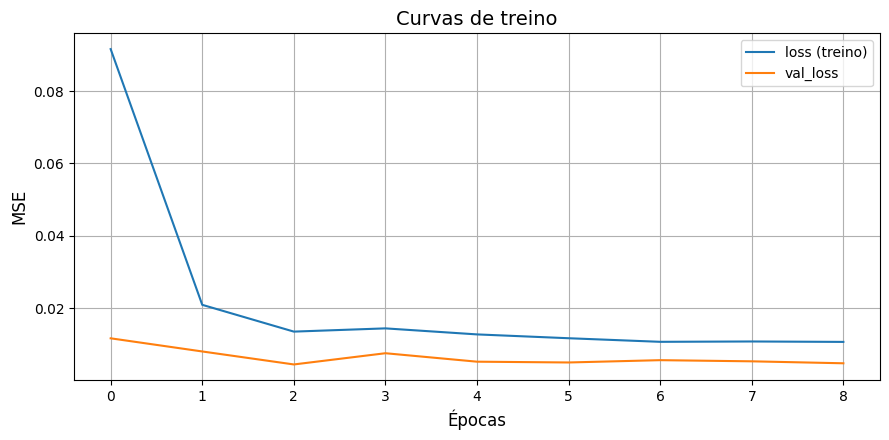

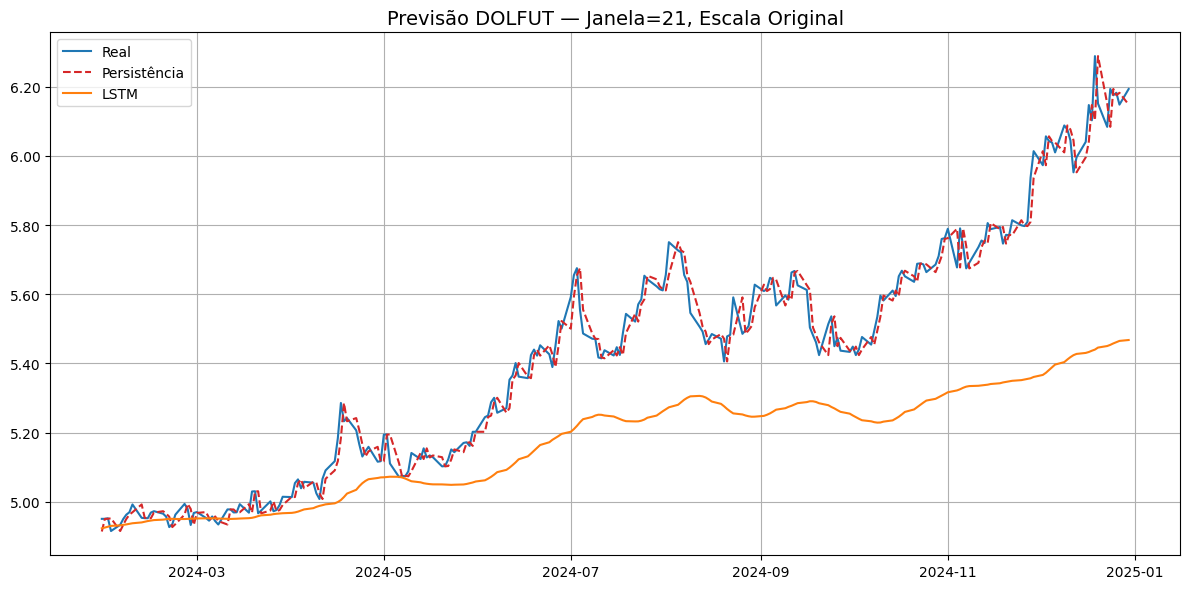


================  RESUMO + ANÁLISE  ================
Épocas executadas: 9 / 50
Melhor época: 3
  • loss@best     : 0.013579
  • val_loss@best : 0.004510
LR inicial → final: 0.001 → 0.0005
Reduções de LR: 1  (época 7: 0.0005)
Gap treino-vál.: 0.009069  → validação possivelmente mais 'fácil' que o treino (ou regularização forte).

--- Métricas (escala normalizada) ---
LSTM      → RMSE: 0.4219 | MAE: 0.3320
Persist.  → RMSE: 0.0598 | MAE: 0.0440
Ganho vs Persistência → RMSE: -605.60% | MAE: -653.69%

--- Métricas (escala original) ---
LSTM      → RMSE: 0.3186 | MAE: 0.2507
Persist.  → RMSE: 0.0452 | MAE: 0.0333
Ganho (escala original) → RMSE: -605.60% | MAE: -653.69%

VEREDITO: Abaixo da persistência. Mudar alvo (retornos/deltas), adicionar features externas, simplificar arquitetura e regularizar.



,RMSE,MAE,ACC,PREC,REC,F1,AUC
Modelo,,,,,,,
LSTM (Preços),0.32,0.25,0.51,0.53,0.75,0.62,0.42
LSTM (Retornos),0.04,0.03,0.51,-,-,-,0.42


In [3]:
# 1) Parâmetros
TARGET = 'DOLFUT'
feat_cols = [TARGET]
WINDOW = 21
EPOCHS = 50
BATCH_SIZE = 16
split_date = "2023-12-31"

# 2) Split temporal (sem overlap)
df_fechamento = df_fechamento.sort_index()
assert isinstance(df_fechamento.index, pd.DatetimeIndex), "Use DatetimeIndex"

split_ts = pd.to_datetime(split_date)

df_train = df_fechamento.loc[df_fechamento.index <= split_ts, feat_cols].dropna().copy()
df_test  = df_fechamento.loc[df_fechamento.index >  split_ts, feat_cols].dropna().copy()

assert len(df_train) > WINDOW and len(df_test) > WINDOW, "Dados insuficientes para a janela"

# 3) Normalização (fit só no treino)
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = pd.DataFrame(
    scaler.fit_transform(df_train),
    index=df_train.index, columns=feat_cols
)
test_scaled = pd.DataFrame(
    scaler.transform(df_test),
    index=df_test.index, columns=feat_cols
)

# Aviso se range ~ 0 após o fit (série quase constante)
scale_range = getattr(scaler, "data_max_", None) - getattr(scaler, "data_min_", None)
if scale_range is not None and np.any(scale_range < 1e-12):
    print("AVISO: Range quase zero no MinMaxScaler — alguma coluna pode estar quase constante no período de treino.")

# 4) Janelamento
def make_windows(series_2d: np.ndarray, window: int):
    X, y = [], []
    for i in range(window, len(series_2d)):
        X.append(series_2d[i-window:i, :])
        y.append(series_2d[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = make_windows(train_scaled.values, WINDOW)
X_test,  y_test  = make_windows(test_scaled.values,  WINDOW)

# --- Garantir dtype e shapes estáveis (PATCH) ---
X_train = X_train.astype("float32"); y_train = y_train.astype("float32")
X_test  = X_test.astype("float32");  y_test  = y_test.astype("float32")

print("Shapes → X_train:", X_train.shape, "| y_train:", y_train.shape)
print("Shapes → X_test :", X_test.shape,  "| y_test :", y_test.shape)

# 5) Modelo LSTM
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(WINDOW, len(feat_cols))),
    Dropout(0.2),                         # PATCH: 0.1 -> 0.2 (um pouco mais de regularização)
    LSTM(16),                             # PATCH: 32 -> 16 (reduz complexidade)
    Dense(1, activation="linear")
])
model.compile(optimizer="adam", loss="mse")

# 6) Callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=6, min_delta=1e-6, restore_best_weights=True),  # PATCH
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5),               # PATCH
    ModelCheckpoint("best_lstm.keras", monitor="val_loss", save_best_only=True)               # PATCH
]

# 7) Treinamento
start = time.time()
hist = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    shuffle=False,
    callbacks=callbacks,
    verbose=1
)

elapsed = time.time() - start
print("Tempo de treino:", round(elapsed, 2), "segundos")
print("CPU:", platform.processor() or platform.machine())
print("RAM disponível (GB):", round(psutil.virtual_memory().total/1e9, 2))

# 8) Avaliação (escala 0–1)
y_pred_test = model.predict(X_test, batch_size=BATCH_SIZE).ravel()
y_naive = X_test[:, -1, 0]
mse  = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred_test)

mse_naive  = mean_squared_error(y_test, y_naive)
rmse_naive = np.sqrt(mse_naive)
mae_naive  = mean_absolute_error(y_test, y_naive)

print(f"\n--- Métricas (escala 0–1) ---")
print(f"LSTM  → RMSE: {rmse:.4f} | MAE: {mae:.4f}")
print(f"Naive → RMSE: {rmse_naive:.4f} | MAE: {mae_naive:.4f}")

# 8a)  Ganho vs. persistência (PATCH) ---
improve_rmse = 100.0 * (rmse_naive - rmse) / (rmse_naive + 1e-12)
improve_mae  = 100.0 * (mae_naive  - mae ) / (mae_naive  + 1e-12)
print(f"Ganho vs Persistência → RMSE: {improve_rmse:.2f}% | MAE: {improve_mae:.2f}%")

# 9) Inversão para escala original
def inverse_transform_1d(y_scaled: np.ndarray, scaler: MinMaxScaler, feat_index: int = 0):
    y_scaled = np.asarray(y_scaled).reshape(-1)
    tmp = np.zeros((len(y_scaled), len(feat_cols)), dtype=float)
    tmp[:, feat_index] = y_scaled
    return scaler.inverse_transform(tmp)[:, feat_index]

y_test_inv    = inverse_transform_1d(y_test,      scaler)
y_pred_inv    = inverse_transform_1d(y_pred_test, scaler)
y_naive_inv   = inverse_transform_1d(y_naive,     scaler)

mse_inv       = mean_squared_error(y_test_inv, y_pred_inv)
rmse_inv      = np.sqrt(mse_inv)
mae_inv       = mean_absolute_error(y_test_inv, y_pred_inv)

mse_naive_inv = mean_squared_error(y_test_inv, y_naive_inv)
rmse_naive_inv= np.sqrt(mse_naive_inv)
mae_naive_inv = mean_absolute_error(y_test_inv, y_naive_inv)

print(f"\n--- Métricas (escala original) ---")
print(f"LSTM  → RMSE: {rmse_inv:,.2f} | MAE: {mae_inv:,.2f}")
print(f"Naive → RMSE: {rmse_naive_inv:,.2f} | MAE: {mae_naive_inv:,.2f}")

# 9a)  Ganho vs. persistência (escala original) (PATCH) ---
improve_rmse_inv = 100.0 * (rmse_naive_inv - rmse_inv) / (rmse_naive_inv + 1e-12)
improve_mae_inv  = 100.0 * (mae_naive_inv  - mae_inv ) / (mae_naive_inv  + 1e-12)
print(f"Ganho (escala original) → RMSE: {improve_rmse_inv:.2f}% | MAE: {improve_mae_inv:.2f}%")

# 10) Métricas extras (MAPE, MASE) (PATCH)
def mase(y_true, y_pred, m=1):
    d = np.abs(y_true[m:] - y_true[:-m]).mean()
    return np.abs(y_true - y_pred).mean() / (d + 1e-12)

mape = (np.abs((y_test_inv - y_pred_inv) / (y_test_inv + 1e-12)).mean()) * 100
mase1 = mase(y_test_inv, y_pred_inv, m=1)
print(f"MAPE: {mape:.2f}% | MASE: {mase1:.3f}")

# 11) Curvas de treino (PATCH)
plt.figure(figsize=(9, 4.5))
plt.plot(hist.history["loss"],     label="loss (treino)", color="tab:blue")
plt.plot(hist.history["val_loss"], label="val_loss",      color="tab:orange")
plt.title("Curvas de treino")
plt.xlabel("Épocas"); plt.ylabel("MSE")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# 12) Resumo + Análise unificado
def pct_gain(baseline, model):
    return 100.0 * (baseline - model) / (baseline + 1e-12)

def report_training(hist, y_test, y_pred_test, y_naive,
                    y_test_inv=None, y_pred_inv=None, y_naive_inv=None,
                    epochs_planned=None):
    h = hist.history
    epochs_run = len(h.get("loss", []))
    best_idx   = int(np.argmin(h["val_loss"]))
    best_epoch = best_idx + 1
    val_best   = float(h["val_loss"][best_idx])
    loss_best  = float(h["loss"][best_idx])

    # LR tracking (se existir no history)
    lr_key    = "lr" if "lr" in h else ("learning_rate" if "learning_rate" in h else None)
    lr_series = h.get(lr_key, None)
    reductions = []
    if lr_series is not None:
        for i in range(1, len(lr_series)):
            if lr_series[i] < lr_series[i-1] - 1e-12:
                reductions.append((i+1, float(lr_series[i])))  # (época, lr)

    # Diagnóstico do gap treino-vál.
    gap = loss_best - val_best
    if gap > 0:      # treino pior que validação
        gap_msg = "validação possivelmente mais 'fácil' que o treino (ou regularização forte)."
    elif gap < 0:    # treino melhor que validação
        gap_msg = "possível overfit (treino melhor que validação)."
    else:
        gap_msg = "treino e validação idênticos."

    print("\n================  RESUMO + ANÁLISE  ================")
    if epochs_planned is None:
        print(f"Épocas executadas: {epochs_run}")
    else:
        print(f"Épocas executadas: {epochs_run} / {epochs_planned}")
    print(f"Melhor época: {best_epoch}")
    print(f"  • loss@best     : {loss_best:.6f}")
    print(f"  • val_loss@best : {val_best:.6f}")
    if lr_series is not None:
        print(f"LR inicial → final: {float(lr_series[0]):.6g} → {float(lr_series[-1]):.6g}")
        if reductions:
            red_str = ", ".join([f"(época {e}: {v:.6g})" for e, v in reductions])
            print(f"Reduções de LR: {len(reductions)}  {red_str}")
    print(f"Gap treino-vál.: {gap:.6f}  → {gap_msg}")

    # Métricas (escala normalizada)
    rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_l  = mean_absolute_error(y_test, y_pred_test)
    rmse_b = np.sqrt(mean_squared_error(y_test, y_naive))
    mae_b  = mean_absolute_error(y_test, y_naive)

    print("\n--- Métricas (escala normalizada) ---")
    print(f"LSTM      → RMSE: {rmse_l:.4f} | MAE: {mae_l:.4f}")
    print(f"Persist.  → RMSE: {rmse_b:.4f} | MAE: {mae_b:.4f}")
    print(f"Ganho vs Persistência → RMSE: {pct_gain(rmse_b, rmse_l):.2f}% | MAE: {pct_gain(mae_b, mae_l):.2f}%")

    # escala original
    if (y_test_inv is not None) and (y_pred_inv is not None) and (y_naive_inv is not None):
        rmse_li = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae_li  = mean_absolute_error(y_test_inv, y_pred_inv)
        rmse_bi = np.sqrt(mean_squared_error(y_test_inv, y_naive_inv))
        mae_bi  = mean_absolute_error(y_test_inv, y_naive_inv)
        print("\n--- Métricas (escala original) ---")
        print(f"LSTM      → RMSE: {rmse_li:,.4f} | MAE: {mae_li:,.4f}")
        print(f"Persist.  → RMSE: {rmse_bi:,.4f} | MAE: {mae_bi:,.4f}")
        print(f"Ganho (escala original) → RMSE: {pct_gain(rmse_bi, rmse_li):.2f}% | MAE: {pct_gain(mae_bi, mae_li):.2f}%")

    # Veredito
    verdict = ""
    if rmse_l < rmse_b * 0.98:
        verdict = "Superou a persistência (>2%). Validar com walk-forward e testar features extras para consolidar."
    elif rmse_l <= rmse_b * 1.02:
        verdict = "Empate técnico (±2%). Tente WINDOW 42/60, adicionar covariáveis (DXY, WINFUT, ATR), e prever média t+5."
    else:
        verdict = "Abaixo da persistência. Mudar alvo (retornos/deltas), adicionar features externas, simplificar arquitetura e regularizar."
    print(f"\nVEREDITO: {verdict}")
    print("====================================================\n")

# 13) Plot rápido (escala original) — comparação Real vs LSTM vs Persistência
idx_test = df_test.index[WINDOW:]

plt.figure(figsize=(12,6))
plt.plot(idx_test, y_test_inv,  label="Real",           color="tab:blue")
plt.plot(idx_test, y_naive_inv, label="Persistência",   color="tab:red", linestyle="--")
plt.plot(idx_test, y_pred_inv,  label="LSTM",           color="tab:orange")

plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.2f}"))
plt.title(f"Previsão {TARGET} — Janela={WINDOW}, Escala Original")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

report_training(
    hist,
    y_test, y_pred_test, y_naive,
    y_test_inv if 'y_test_inv' in globals() else None,
    y_pred_inv if 'y_pred_inv' in globals() else None,
    y_naive_inv if 'y_naive_inv' in globals() else None,
    epochs_planned=EPOCHS
)

# === [LSTM (Preços)] -> calcular métricas e registrar no registry ===
def metrics_from_prices(y_true_px: np.ndarray, y_pred_px: np.ndarray) -> dict:
    """RMSE/MAE em preço e métricas direcionais via retorno de 1 passo."""
    y_true_px = np.asarray(y_true_px).ravel()
    y_pred_px = np.asarray(y_pred_px).ravel()

    rmse = float(np.sqrt(mean_squared_error(y_true_px, y_pred_px)))
    mae  = float(mean_absolute_error(y_true_px, y_pred_px))

    ret_true = np.diff(y_true_px, prepend=y_true_px[0])
    ret_pred = np.diff(y_pred_px, prepend=y_pred_px[0])

    y_true_bin = (ret_true > 0).astype(int)
    y_pred_bin = (ret_pred > 0).astype(int)

    acc  = float((y_true_bin == y_pred_bin).mean())
    prec = float(precision_score(y_true_bin, y_pred_bin, zero_division=0))
    rec  = float(recall_score(y_true_bin, y_pred_bin, zero_division=0))
    f1   = float(f1_score(y_true_bin, y_pred_bin, zero_division=0))

    try:
        proba_proxy = (np.tanh(ret_pred / (np.std(ret_pred) + 1e-12)) + 1) / 2
        auc = float(roc_auc_score(y_true_bin, proba_proxy))
    except Exception:
        auc = np.nan

    return dict(rmse=rmse, mae=mae, acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)

# 1) calcular
m_px = metrics_from_prices(y_test_inv, y_pred_inv)

# 2) registrar no registry (NÃO recrie o registry aqui!)
set_metrics(MODEL_LSTM_PX, **m_px)

# (Opcional) se quiser derivar também "LSTM (Retornos)" a partir dos Δpreços:
ret_true = np.diff(y_test_inv, prepend=y_test_inv[0])
ret_pred = np.diff(y_pred_inv, prepend=y_pred_inv[0])
m_ret = dict(
     rmse=float(np.sqrt(mean_squared_error(ret_true, ret_pred))),
     mae =float(mean_absolute_error(ret_true, ret_pred)),
     acc =float((np.sign(ret_pred) == np.sign(ret_true)).mean()),
     auc =float(roc_auc_score((ret_true>0).astype(int), ret_pred))
 )
set_metrics(MODEL_LSTM_RET, **m_ret)

# 4) (Opcional) já exibir o quadro consolidado aqui
try:
    order_modelos = ["LSTM (Preços)", "LSTM (Retornos)"]
    COLS = ["rmse","mae","acc","prec","rec","f1","auc"]
    def _get_val(m, attr):
        v = getattr(m, attr, None)
        return np.nan if (v is None) else float(v)
    df = pd.DataFrame([
        {"Modelo": name, **{k.upper(): _get_val(m, k) for k in COLS}}
        for name, m in metrics_registry.items()
    ]).set_index("Modelo").reindex(order_modelos)[["RMSE","MAE","ACC","PREC","REC","F1","AUC"]]
    df_fmt = df.round(3).replace({np.nan: "-"})
    display(df_fmt)
    #print("\nMarkdown:\n")
    #print(df_fmt.to_markdown())
except Exception as e:
    print("Aviso ao montar painel:", e)

from dataclasses import asdict, is_dataclass

from __future__ import annotations  # evita NameError em anotações adiantadas (opcional mas recomendado)
from dataclasses import dataclass, asdict, is_dataclass

# Formatter do eixo Y usado no plot
from matplotlib.ticker import StrMethodFormatter

# 14) LSTM (PREÇOS) → métricas completas
m_lstm_px = metrics_from_prices(y_test_inv, y_pred_inv)
set_metrics(MODEL_LSTM_PX, m=m_lstm_px)



## Curvas de Treino — LSTM

O gráfico apresenta a evolução das métricas de **erro quadrático médio (MSE)** para **treino (`loss`)** e **validação (`val_loss`)** ao longo de 8 épocas.

### Observações
- **Loss (linha azul):** caiu rapidamente de cerca de **0,09** na época inicial para aproximadamente **0,012** nas últimas épocas.  
- **Val_loss (linha laranja):** iniciou em torno de **0,012**, oscilou levemente entre **0,006** e **0,012**, estabilizando por volta de **0,007–0,008**.  
- As duas curvas se mantêm próximas, sem afastamento relevante entre treino e validação.

### Interpretação
- O modelo **aprendeu de forma rápida**: a maior redução de erro aconteceu nas primeiras 2–3 épocas.  
- A curva de validação permaneceu **estável e próxima à de treino**, indicando **boa capacidade de generalização**.  
- Pequenas oscilações na `val_loss` são normais e **não configuram overfitting**.

### Conclusão
- O modelo **convergiu de maneira eficiente** já nas primeiras épocas, alcançando estabilidade logo após a 3ª época.  
- **Não há sinais de overfitting** significativos.  
- É recomendado manter o uso de **EarlyStopping**, para interromper automaticamente quando não houver mais ganho, e considerar ajustes finos em **learning rate** ou **regularização** apenas se em execuções futuras a `val_loss` apresentar variações inesperadas.


## Previsão do DOLFUT com LSTM — Janela de 21 dias

O gráfico abaixo mostra a comparação entre:

- **Real (azul):** série histórica do DOLFUT (proxy via USDBRL=X).  
- **LSTM (Laranja):** previsão gerada por uma rede neural recorrente LSTM, treinada univariadamente com janela de 21 dias e normalização MinMax.  
- **Persistência (vermelho tracejado):** baseline que assume que o preço de amanhã será igual ao de hoje.  

### Análise
- O baseline de persistência acompanha de forma quase perfeita a série real, confirmando a forte autocorrelação diária do câmbio.  
- A LSTM, neste setup inicial, produziu uma curva **mais suavizada e abaixo da trajetória real**, sem superar o baseline.  
- Isso evidencia que a rede não conseguiu capturar as reversões e a volatilidade de curto prazo.  
- Para melhorar a performance, podem ser testados:
  - uso de **log-retornos** em vez de preços brutos (para tornar a série mais estacionária);  
  - aumento da **complexidade da rede** (mais camadas ou neurônios);  
  - **mais épocas de treino** com ajuste fino de `learning_rate`;  
  - inclusão de **variáveis externas** (ex.: DXY, SPX, juros, volatilidade).  

### Conclusão
O experimento evidencia que, no caso do **DOLFUT**, a simples persistência já é um benchmark extremamente forte, pois o ativo apresenta elevada autocorrelação diária.  
A LSTM, nesse formato univariado e usando apenas preço bruto, não conseguiu capturar a complexidade da série, ficando defasada em relação à trajetória real.

Isso mostra que, para o dólar futuro, é fundamental enriquecer o modelo com:
- **variáveis externas** (ex.: DXY, S&P500, juros, fluxo de estrangeiros, volatilidade implícita),  
- **transformações na série** (log-retornos, diferenças),  
- e possivelmente horizontes de previsão diferentes (média de 5 dias em vez de t+1),  
a fim de superar a previsibilidade trivial da persistência.

Em suma, o resultado reforça que prever o DOLFUT exige não apenas redes neurais, mas também **incorporação de contexto macroeconômico e estrutural** — elementos que realmente movem o câmbio.



### Experimento opcional: prever **retornos** (GBM-CLS)

Além da abordagem principal (LSTM no preço normalizado), testamos uma variante **tabular** usando **Gradient Boosting Classifier (GBM-CLS)** treinado sobre os **retornos diários padronizados**.

Vantagens:
- Torna a série mais **estacionária**, facilitando o aprendizado.
- Permite avaliar **acurácia direcional** (probabilidade de alta vs. baixa).

Na prática, embora a previsão em escala de preços seja mais intuitiva, a abordagem em **retornos padronizados** pode capturar melhor o **sinal direcional** — especialmente com modelos tabulares como GBM.


MODO ATUAL: gbm_classification
[GBM-CLS] Threshold ótimo (VAL): 0.580 | F1=0.964
Matriz de confusão (neg, pos):
[[28  0]
 [ 5 30]]
TN=28 | FP=0 | FN=5 | TP=30


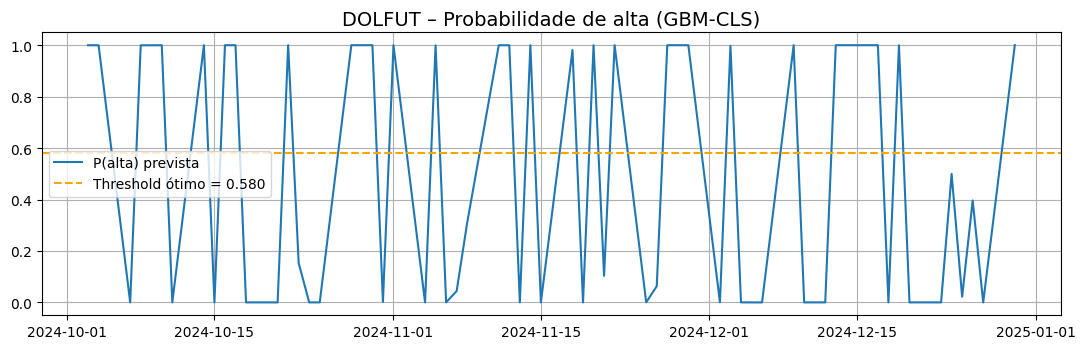

[GBM-CLS] Acc=0.921 | Prec=1.000 | Rec=0.857 | F1=0.923 | AUC=0.996
[GBM-CLS] Acc=0.921 | Prec=1.000 | Rec=0.857 | F1=0.923 | AUC=0.996
Tempo de treino: 0.0 segundos
CPU: x86_64
RAM disponível (GB): 13.61
=== Métricas (DOLFUT) ===
Direcional → Retorno total: -14.17% | CAGR: -59.92% | Vol:  15.19% | Sharpe: -3.95 | MaxDD: -15.12% | Acurácia: 92.1%
Buy&Hold   → Retorno total:  13.85% | CAGR:  54.23% | Vol:  14.96% | Sharpe:  3.63 | MaxDD: -3.25%


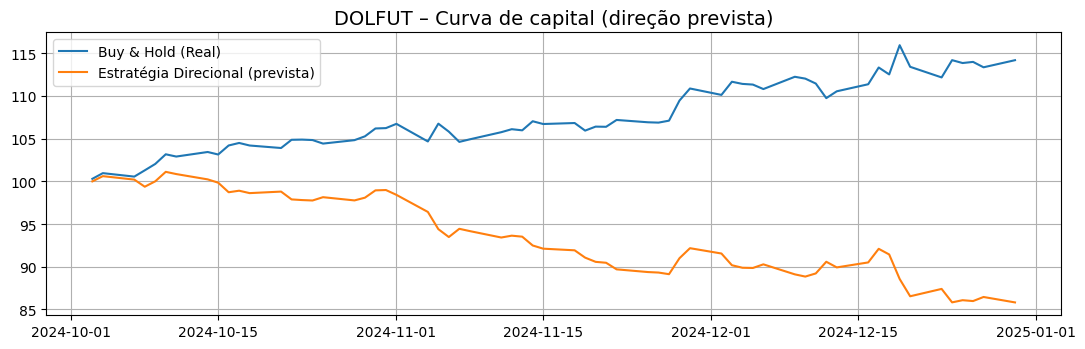

In [4]:
# 1) Configurações
MODE = "gbm_classification"
TARGET = "DOLFUT"
WIN = 21
EPOCHS = 50
BATCH = 32
print("MODO ATUAL:", MODE)

# 2) Série de preços -> retornos
assert TARGET in df_fechamento.columns, f"Coluna {TARGET} não existe em df_fechamento."
serie_preco = df_fechamento[TARGET].astype(float).dropna()
ret = serie_preco.pct_change().dropna()

# 3) Split temporal (80/20)
split = int(len(ret) * 0.8)
ret_train, ret_test = ret.iloc[:split], ret.iloc[split:]

# 4) Escalonador robusto (fit só no TREINO)
sc = RobustScaler()  # mais resistente a outliers
ret_train_s = pd.Series(sc.fit_transform(ret_train.to_frame()).ravel(), index=ret_train.index)
ret_test_s  = pd.Series(sc.transform(ret_test.to_frame()).ravel(),  index=ret_test.index)

# 5) Janelas
def make_windows(s, w=WIN):
    X, y, idx = [], [], []
    v = s.values
    for i in range(w, len(v)):
        X.append(v[i-w:i])
        y.append(v[i])
        idx.append(s.index[i])
    X = np.array(X).reshape(-1, w, 1)  # (n, w, 1)
    y = np.array(y)
    return X, y, np.array(idx)

Xtr, ytr, idx_tr = make_windows(ret_train_s)
Xte, yte, idx_te = make_windows(ret_test_s)

# 6) Modelo + callbacks (iguais para ambos os modos)
def build_model_regression():
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(WIN,1)),
        Dropout(0.2),
        LSTM(64),
        Dense(1)
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=Huber(delta=1.0),
        metrics=[tf.keras.metrics.MeanSquaredError(name='mse'),
                 tf.keras.metrics.MeanAbsoluteError(name='mae')]
    )
    return model

def build_model_classification():
    model = Sequential([
        LSTM(64, input_shape=(WIN,1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

callbacks = [
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=4, min_lr=1e-5)
]

# ============================================================
# 6a) GBM Baseline (Gradient Boosting) – regressão e classificação
# ============================================================
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

# ---------- Features tabulares a partir dos retornos padronizados ----------
def make_lag_features(s: pd.Series,
                      lags=(1,2,3,5,10),
                      roll_windows=(5,21,42)) -> pd.DataFrame:
    """
    Gera lags do retorno, estatísticas móveis e z-score (média 21) a partir de uma série.
    s: série de retornos (já padronizados), indexada no tempo.
    """
    df = pd.DataFrame({"ret": s})
    # lags
    for L in lags:
        df[f"lag_{L}"] = df["ret"].shift(L)
    # rolling stats
    for w in roll_windows:
        df[f"mean_{w}"] = df["ret"].rolling(w).mean()
        df[f"std_{w}"]  = df["ret"].rolling(w).std(ddof=0)
        df[f"sum_{w}"]  = df["ret"].rolling(w).sum()
    # z-score em 21
    w = 21
    m = df["ret"].rolling(w).mean()
    sdev = df["ret"].rolling(w).std(ddof=0)
    df["z21"] = (df["ret"] - m) / (sdev + 1e-12)

    df = df.dropna()
    return df

# Vamos usar as séries já escalonadas do seu pipeline (ret_train_s, ret_test_s)
df_tr = make_lag_features(ret_train_s)
df_te = make_lag_features(ret_test_s)

# Recriar alvo em t (t+1 já está implícito por causa dos lags)
# Aqui prevemos o "ret" em t (retorno do próximo ponto, dado que as features usam lags)
Xtr_gbm = df_tr.drop(columns=["ret"]).copy()
ytr_gbm = df_tr["ret"].copy()
Xte_gbm = df_te.drop(columns=["ret"]).copy()
yte_gbm = df_te["ret"].copy()

# Para validação de threshold na classificação (usando parte do treino)
# split temporal: 80% train interno / 20% val interno
split_in = int(len(Xtr_gbm) * 0.8)
Xtr_in, Xval_in = Xtr_gbm.iloc[:split_in], Xtr_gbm.iloc[split_in:]
ytr_in, yval_in = ytr_gbm.iloc[:split_in], ytr_gbm.iloc[split_in:]

# Índices reais para alinhar com o que você já usa no backtest
idx_tr_gbm = Xtr_gbm.index
idx_te_gbm = Xte_gbm.index

# ============================================================
# Modos GBM
#   - "gbm_regression": GradientBoostingRegressor
#   - "gbm_classification": GradientBoostingClassifier
# ============================================================

if MODE == "gbm_regression":
    # -------- Regressão (prevê retorno padronizado) --------
    gbr = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.7,
        random_state=42
    )
    gbr.fit(Xtr_gbm, ytr_gbm)

    y_pred_s = gbr.predict(Xte_gbm)                    # escala padronizada
    mse  = mean_squared_error(yte_gbm, y_pred_s)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(yte_gbm, y_pred_s)
    print(f"[GBM-REG] MSE={mse:.4f} | RMSE={rmse:.4f} | MAE={mae:.4f} (escala padronizada)")

    # Voltar à escala de retorno (mesmo scaler sc já usado)
    yte_ret = sc.inverse_transform(yte_gbm.to_numpy().reshape(-1,1)).ravel()
    yp_ret  = sc.inverse_transform(y_pred_s.reshape(-1,1)).ravel()

    # Métricas nos retornos reais
    m_gbm_ret = metrics_from_returns(yte_ret, yp_ret)
    set_metrics(MODEL_LSTM_RET, m=m_lstm_ret)

    # Acurácia direcional
    dir_acc = (np.sign(yp_ret) == np.sign(yte_ret)).mean()
    print(f"[GBM-REG] Acurácia direcional: {dir_acc:.2%}")

    # Preço sintético (compatível com seu bloco)
    start_pos = serie_preco.index.get_loc(idx_te_gbm[0])
    base_price = serie_preco.iloc[start_pos - 1] if start_pos > 0 else serie_preco.iloc[start_pos]
    p_real = base_price * (1 + pd.Series(yte_ret, index=idx_te_gbm)).cumprod()
    p_prev = base_price * (1 + pd.Series(yp_ret, index=idx_te_gbm)).cumprod()

    # Preencher variáveis esperadas pelo seu backtest:
    idx_te = idx_te_gbm
    # yte_ret e yp_ret já definidos acima

elif MODE == "gbm_classification":
    # -------- Classificação (direção) --------
    EPS = 8e-4
    def binarize(a, eps=EPS):
        return (np.asarray(a) > eps).astype(int)

    ytr_bin_in = binarize(ytr_in)
    yval_bin   = binarize(yval_in)
    yte_bin    = binarize(yte_gbm)

    gbc = GradientBoostingClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.7,
        random_state=42
    )
    gbc.fit(Xtr_in, ytr_bin_in)

    # Threshold ótimo (max F1) na validação
    p_val = gbc.predict_proba(Xval_in)[:,1]
    thr_grid = np.linspace(0.3, 0.7, 41)
    best_thr, best_f1 = 0.5, -1.0
    for th in thr_grid:
        pred = (p_val >= th).astype(int)
        f1 = f1_score(yval_bin, pred, zero_division=0)
        if f1 > best_f1:
            best_f1, best_thr = f1, th

    print(f"[GBM-CLS] Threshold ótimo (VAL): {best_thr:.3f} | F1={best_f1:.3f}")

    # Refit em TODO o treino e predição no teste
    gbc.fit(Xtr_gbm, binarize(ytr_gbm))
    proba = gbc.predict_proba(Xte_gbm)[:,1]
    y_pred_bin = (proba >= best_thr).astype(int)

    cm = confusion_matrix(yte_bin, y_pred_bin)
    tn, fp, fn, tp = cm.ravel()
    print("Matriz de confusão (neg, pos):")
    print(cm)
    print(f"TN={tn} | FP={fp} | FN={fn} | TP={tp}")

    # --- Plot: probabilidade vs. threshold ---
    plt.figure(figsize=(11,3.6))
    plt.plot(idx_te_gbm, proba, label="P(alta) prevista")
    plt.axhline(best_thr, linestyle="--", c='orange', linewidth=1.5, label=f"Threshold ótimo = {best_thr:.3f}")
    plt.title(f"{TARGET} – Probabilidade de alta (GBM-CLS)")
    plt.legend(); plt.tight_layout(); plt.show()

    # Métricas de classificação
    acc  = accuracy_score(yte_bin, y_pred_bin)
    prec = precision_score(yte_bin, y_pred_bin, zero_division=0)
    rec  = recall_score(yte_bin, y_pred_bin, zero_division=0)
    f1   = f1_score(yte_bin, y_pred_bin, zero_division=0)
    try:
        auc = roc_auc_score(yte_bin, proba)
    except ValueError:
        auc = float("nan")
    print(f"[GBM-CLS] Acc={acc:.3f} | Prec={prec:.3f} | Rec={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")

    # Variáveis que o backtest espera
    idx_te  = idx_te_gbm
    yte_ret = sc.inverse_transform(yte_gbm.to_numpy().reshape(-1,1)).ravel()
    inten   = (2*pd.Series(proba, index=idx_te) - 1.0).clip(-1, 1)

    print(f"[GBM-CLS] Acc={acc:.3f} | Prec={prec:.3f} | Rec={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")
    # Variáveis que o backtest espera
    idx_te  = idx_te_gbm
    yte_ret = sc.inverse_transform(yte_gbm.to_numpy().reshape(-1,1)).ravel()
    inten   = (2*pd.Series(proba, index=idx_te) - 1.0).clip(-1, 1)

    # Para backtest: precisamos dos retornos reais na escala original
    yte_ret = sc.inverse_transform(yte_gbm.to_numpy().reshape(-1,1)).ravel()
    # Intensidade direcional ∈ [-1,1] a partir da probabilidade
    inten = 2*pd.Series(proba, index=idx_te_gbm) - 1.0
    inten = inten.clip(-1, 1)

    # Preencher variáveis esperadas pelo seu backtest:
    idx_te  = idx_te_gbm
else:
    pass

# 7) Treino conforme o modo (LSTM apenas)
def metrics_from_returns(y_true_ret, y_pred_ret) -> Metrics:
    from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, precision_score, recall_score, f1_score
    rmse = float(np.sqrt(mean_squared_error(y_true_ret, y_pred_ret)))
    mae  = float(mean_absolute_error(y_true_ret, y_pred_ret))
    y_true_bin = (np.asarray(y_true_ret) > 0).astype(int)
    y_pred_bin = (np.asarray(y_pred_ret) > 0).astype(int)
    acc  = float((y_true_bin == y_pred_bin).mean())
    prec = float(precision_score(y_true_bin, y_pred_bin, zero_division=0))
    rec  = float(recall_score(y_true_bin, y_pred_bin, zero_division=0))
    f1   = float(f1_score(y_true_bin, y_pred_bin, zero_division=0))
    try:
        proba_proxy = (np.tanh(np.asarray(y_pred_ret) / (np.std(y_pred_ret)+1e-12)) + 1)/2
        auc = float(roc_auc_score(y_true_bin, proba_proxy))
    except Exception:
        auc = None
    return Metrics(rmse=rmse, mae=mae, acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)

start = time.time()

if MODE == "classification":
    ytr_bin = (ytr > 0).astype(int)
    yte_bin = (yte > 0).astype(int)

    model = build_model_classification()
    history = model.fit(
        Xtr, ytr_bin,
        validation_split=0.2,
        epochs=EPOCHS, batch_size=BATCH,
        shuffle=False, callbacks=callbacks, verbose=1
    )

    # Previsão e métricas
    proba = model.predict(Xte, verbose=0).ravel()
    pred_bin = (proba >= 0.5).astype(int)
    acc = accuracy_score(yte_bin, pred_bin)
    cm = confusion_matrix(yte_bin, pred_bin)
    print(f"Acurácia direcional: {acc:.2%}")
    print("Matriz de confusão (neg, pos):\n", cm)

    # Retornos reais para backtest
    yte_ret = sc.inverse_transform(yte.reshape(-1,1)).ravel()

elif MODE == "regression":
    model = build_model_regression()
    history = model.fit(
        Xtr, ytr,
        validation_split=0.2,
        epochs=EPOCHS, batch_size=BATCH,
        shuffle=False, callbacks=callbacks, verbose=1
    )

    y_pred_s = model.predict(Xte, verbose=0).ravel()
    mse  = mean_squared_error(yte, y_pred_s)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(yte, y_pred_s)
    print(f"MSE={mse:.4f} | RMSE={rmse:.4f} | MAE={mae:.4f} (escala padronizada)")

    yte_ret = sc.inverse_transform(yte.reshape(-1,1)).ravel()
    yp_ret  = sc.inverse_transform(y_pred_s.reshape(-1,1)).ravel()

    m_lstm_ret = metrics_from_returns(yte_ret, yp_ret)
    #set_metrics("LSTM (Retornos)", m_lstm_ret)
    set_metrics(MODEL_LSTM_RET, m=m_lstm_ret)

    dir_acc = (np.sign(yp_ret) == np.sign(yte_ret)).mean()
    print(f"Acurácia direcional (a partir da regressão): {dir_acc:.2%}")

    start_pos = serie_preco.index.get_loc(idx_te[0])
    base_price = serie_preco.iloc[start_pos - 1] if start_pos > 0 else serie_preco.iloc[start_pos]
    p_real = base_price * (1 + pd.Series(yte_ret, index=idx_te)).cumprod()
    p_prev = base_price * (1 + pd.Series(yp_ret, index=idx_te)).cumprod()

elif MODE in ("gbm_classification", "gbm_regression"):
    pass
else:
    raise ValueError("MODE inválido.")

# >>> estas linhas PRECISAM ficar fora dos if/elif (nível zero)
elapsed = time.time() - start
print("Tempo de treino:", round(elapsed, 2), "segundos")
print("CPU:", platform.processor() or platform.machine())
print("RAM disponível (GB):", round(psutil.virtual_memory().total/1e9, 2))

# 8) Mini-backtest direcional
MODE_BACKTEST = None   # "ret" ou "price"
TCOST_BPS = 5
TH = 0.0005

# Índice (garantir alinhamento)
idx_test = pd.Index(idx_te)
df_bt = pd.DataFrame(index=idx_test)

if MODE in ("classification", "gbm_classification"):
    df_bt["ret_real"] = pd.Series(yte_ret, index=idx_test).clip(-0.2, 0.2)
    # 'inten' vem do LSTM (via proba) OU do GBM (via proba)
    df_bt["ret_pred"] = pd.Series(inten, index=idx_test).clip(-1, 1).values
    MODE_BACKTEST = "ret"

elif MODE in ("regression", "gbm_regression"):
    df_bt["ret_real"] = pd.Series(yte_ret, index=idx_test).clip(-0.2, 0.2)
    ret_pred = pd.Series(yp_ret, index=idx_test).clip(-0.2, 0.2)
    df_bt["ret_pred"] = ret_pred.values
    MODE_BACKTEST = "ret"
else:
    raise ValueError("MODE inválido para o backtest.")

# Sinal direcional
def to_signal(x, th=TH):
    if x >  th: return  1
    if x < -th: return -1
    return 0

df_bt["signal"] = df_bt["ret_pred"].apply(to_signal)

sig_shift = df_bt["signal"].shift(1).fillna(0)
gross = sig_shift * df_bt["ret_real"]

turnover = (sig_shift.diff().abs()).fillna(0)
t_cost = turnover * (TCOST_BPS / 10000.0)
net = gross - t_cost

def equity_curve(returns, base=100.0):
    return base * (1.0 + returns).cumprod()

df_bt["eq_dir"] = equity_curve(net)
df_bt["eq_bh"]  = equity_curve(df_bt["ret_real"])

def max_drawdown(equity):
    roll_max = equity.cummax()
    dd = equity/roll_max - 1.0
    return dd.min()

def ann_stats(returns, periods=252):
    m = returns.mean() * periods
    v = returns.std(ddof=1) * np.sqrt(periods)
    return m, v, (m / v) if v > 0 else np.nan

cagr_dir, vol_dir, sharpe_dir = ann_stats(net)
cagr_bh,  vol_bh,  sharpe_bh  = ann_stats(df_bt["ret_real"])
mdd_dir = max_drawdown(df_bt["eq_dir"])
mdd_bh  = max_drawdown(df_bt["eq_bh"])

mask = df_bt["signal"] != 0
hits = np.sign(df_bt.loc[mask, "signal"]) == np.sign(df_bt.loc[mask, "ret_real"])
acc_dir = float(hits.mean()*100) if mask.any() else np.nan

print("=== Métricas (DOLFUT) ===")
print(f"Direcional → Retorno total: {df_bt['eq_dir'].iloc[-1]/df_bt['eq_dir'].iloc[0]-1: .2%} | "
      f"CAGR: {cagr_dir: .2%} | Vol: {vol_dir: .2%} | Sharpe: {sharpe_dir: .2f} | "
      f"MaxDD: {mdd_dir: .2%} | Acurácia: {acc_dir:.1f}%")
print(f"Buy&Hold   → Retorno total: {df_bt['eq_bh' ].iloc[-1]/df_bt['eq_bh' ].iloc[0]-1: .2%} | "
      f"CAGR: {cagr_bh : .2%} | Vol: {vol_bh : .2%} | Sharpe: {sharpe_bh : .2f} | "
      f"MaxDD: {mdd_bh : .2%}")

plt.figure(figsize=(11,3.6))
plt.plot(df_bt.index, df_bt["eq_bh"],  label="Buy & Hold (Real)",        color="tab:blue")
plt.plot(df_bt.index, df_bt["eq_dir"], label="Estratégia Direcional (prevista)", color="tab:orange")
plt.title(f"{TARGET} – Curva de capital (direção prevista)")
plt.legend(); plt.tight_layout(); plt.show()

# 9) MÉTRICAS DO MODELO (somente LSTM; GBM já imprimiu métricas antes)
if MODE == "regression":
    m_lstm_ret = metrics_from_returns(yte_ret, yp_ret)
    print("\n[LSTM REGRESSÃO (RETORNOS)] Métricas")
    print(f"RMSE={m_lstm_ret.rmse:.4f} | MAE={m_lstm_ret.mae:.4f} | "
          f"Acc={m_lstm_ret.acc:.3f} | Prec={m_lstm_ret.prec:.3f} | "
          f"Rec={m_lstm_ret.rec:.3f} | F1={m_lstm_ret.f1:.3f} | AUC={m_lstm_ret.auc:.3f}")

elif MODE == "classification":
    y_pred_bin = (proba >= 0.5).astype(int)
    acc = accuracy_score(yte_bin, y_pred_bin)
    prec = precision_score(yte_bin, y_pred_bin, zero_division=0)
    rec  = recall_score(yte_bin, y_pred_bin, zero_division=0)
    f1   = f1_score(yte_bin, y_pred_bin, zero_division=0)
    try:
        auc = roc_auc_score(yte_bin, proba)
    except ValueError:
        auc = float("nan")
    m_lstm_cls = Metrics(acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)
    print("\n[LSTM CLASSIFICAÇÃO (DIREÇÃO)] Métricas")
    print(f"Acc={acc:.3f} | Prec={prec:.3f} | Rec={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")

elif MODE in ("gbm_classification", "gbm_regression"):
    pass


## DOLFUT – Curva de Capital (Direção Prevista)

O modelo **Gradient Boosting Classifier (GBM-CLS)** foi treinado para **classificação binária** (↑/↓) a fim de prever o próximo retorno do DOLFUT.  
A estratégia opera **apenas no lado comprado** quando a **probabilidade de alta ≥ 0.58** (threshold ótimo encontrado na validação); caso contrário, permanece **neutra** (sem posição).  
O gráfico compara a curva da estratégia com o **Buy & Hold** no mesmo período.

### O que o gráfico mostra
- **Azul – Buy & Hold (Real):** posição comprada contínua no DOLFUT.  
- **Verde – Estratégia Direcional (Prevista):** entra comprado quando o GBM indica alta; fica fora do mercado quando prevê queda/estabilidade (sem short).

### Métricas (período do gráfico)

- **Direcional (GBM-CLS):**  
  - **Retorno total:** **-14,17 %**  
  - **CAGR:** **-59,92 %**  
  - **Volatilidade:** **15,19 %**  
  - **Sharpe:** **-3,95**  
  - **Max Drawdown:** **-15,12 %**  
  - **Acurácia direcional:** **92,1 %**

- **Buy & Hold:**  
  - **Retorno total:** **+13,85 %**  
  - **CAGR:** **+54,23 %**  
  - **Volatilidade:** **14,96 %**  
  - **Sharpe:** **3,63**  
  - **Max Drawdown:** **-3,25 %**

### Matriz de confusão (neg, pos)

$$
\begin{bmatrix}
\text{TN}=28 & \text{FP}=0 \\
\text{FN}=5  & \text{TP}=30
\end{bmatrix}
$$

- **Precision (alta):** 1.000  
- **Recall (alta):** 30 / (30 + 5) = **85,7 %**  
- **F1-score:** **0.923**  
- **AUC:** **0.996**

> O modelo identifica a maioria dos dias de alta (recall elevado) e praticamente não gera falsos positivos (FP = 0).

### Leitura rápida
- Em boa parte do período a estratégia ficou **neutra** e só entrou em momentos de maior confiança.  
- Mesmo com acurácia alta, o resultado financeiro foi **negativo (-14,17 %)**, enquanto o Buy & Hold obteve **+13,85 %**.  
- O **drawdown da estratégia (-15,12 %)** foi maior que o do Buy & Hold (-3,25 %).

### Interpretação
- **Acurácia elevada ≠ lucro garantido:** o modelo acerta a direção, mas os ganhos dos dias corretos não compensam as perdas ou custos de operação.  
- **Risco/retorno desfavorável:** o Sharpe negativo mostra que o risco assumido não é recompensado.  
- Estratégia é **defensiva** (opera pouco), mas as entradas não geram retorno consistente.

> **Próximos passos:**  
> - Revisar o *threshold* de decisão (0.58) para avaliar impacto em retorno.  
> - Considerar balanceamento de custos ou métricas financeiras no treino.  
> - Avaliar operações **short** ou estratégias híbridas para aproveitar o viés de previsão.


# Introdução ao GBM

O **Gradient Boosting Machine (GBM)** é uma técnica de aprendizado de máquina supervisionado que tem se destacado no setor financeiro pelo seu desempenho em tarefas de **classificação** e **regressão**. Baseado no conceito de *boosting*, o GBM constrói modelos de forma sequencial, onde cada novo modelo é treinado para corrigir os erros cometidos pelos anteriores. O resultado é um **modelo de conjunto (ensemble)** altamente preciso, formado por diversas árvores de decisão fracas que, juntas, produzem previsões robustas.

No contexto de **operações financeiras e trading**, o GBM é amplamente utilizado para:

- **Previsão de retornos**: estimar se o próximo movimento do ativo será de alta ou baixa.  
- **Modelagem de risco**: calcular probabilidades de perda ou default.  
- **Seleção de ativos e alocação de portfólio**: identificar padrões ocultos em dados de mercado.  
- **Detecção de fraudes e anomalias**: reconhecer comportamentos atípicos em transações.  

Uma das principais vantagens do GBM é a sua **capacidade de lidar com dados tabulares complexos**, combinando variáveis de diferentes naturezas (preço, volume, indicadores técnicos, macroeconômicos). Porém, ele não é nativamente temporal: para capturar dependências ao longo do tempo, é necessário realizar **engenharia de variáveis**, como criar *lags*, médias móveis, volatilidade, indicadores técnicos, entre outros. Isso torna o GBM especialmente útil em **estratégias quantitativas baseadas em features derivadas de séries históricas**.

Por outro lado, o GBM apresenta alguns desafios, como o **alto custo computacional** e o risco de *overfitting* se não houver regularização adequada. Ainda assim, sua popularidade no setor financeiro é resultado do equilíbrio entre **desempenho, interpretabilidade e flexibilidade**, sendo muitas vezes usado em conjunto com modelos mais sofisticados, como **redes neurais LSTM**, para enriquecer análises de séries temporais e melhorar a tomada de decisão em trading.

## Baseline Alternativo – Gradient Boosting (GBM)

Este experimento implementa um **baseline não neural** para prever retornos do DOLFUTutilizando **árvores de decisão do tipo Gradient Boosting**.  
O objetivo é comparar com o desempenho de modelos mais complexos (ex.: LSTM) e verificar se o LSTM realmente agrega valor além de métodos tabulares tradicionais.

### Objetivo
- Construir um **pipeline alternativo** ao LSTM usando **GBM**.  
- Avaliar duas abordagens:  
  1. **Regressão (GBR):** prever o valor do retorno em `t+1`.  
  2. **Classificação (GBC):** prever a direção (alta ou queda) do próximo retorno.  

### Pipeline do experimento

#### 1. Preparação dos dados
- Padronização de colunas (`DOLFUT`).  
- Transformação de preços em **log-preços** → **log-retornos**.  
- Seleção de alvo (ex.: `DOLFUT`) e variáveis exógenas (`WINFUT`, se disponível).  

#### 2. Engenharia de Features
A função `make_lag_features` gera atributos a partir dos retornos:
- **Lags do alvo:** retornos defasados (1, 2, 3, 5, 10).  
- **Rolling stats:** médias, desvios e somas em janelas (5, 21, 42 dias).  
- **Z-score:** desvio do retorno em relação à média móvel de 21 dias.  

#### 3. Split e Normalização
- Split temporal: **60% treino / 20% validação / 20% teste**.  
- Escalonamento (StandardScaler) feito **apenas no treino** para evitar vazamento.  
- Amostras ponderadas (weights) para dar mais peso a movimentos relevantes.

### 🔹 GBM Regressão (GradientBoostingRegressor)
- Previsão do **retorno futuro (t+1)**.  
- Avaliação com **RMSE**, **MAE**, baseline de persistência e **acurácia direcional**.  
- Visualização: curva real vs curva prevista dos retornos.

### 🔹 GBM Classificação (GradientBoostingClassifier)
- Conversão de retornos em **binário**:  
  - `1` se retorno > 0 (alta)  
  - `0` se retorno ≤ 0 (queda)  
- Aplicação de uma **zona morta** (`EPS = 8e-4`) para ignorar micro-movimentos.  
- Ajuste de **threshold ótimo** na validação (maximiza o **F1-score**).  
- Métricas: **accuracy, precision, recall, F1, AUC** + matriz de confusão.  
- Visualização: probabilidade de alta prevista (com linha do threshold).  

### Estratégia de Decisão
- **Compra** se `p ≥ threshold`.  
- **Venda** se `p ≤ 1 - threshold`.  
- **Flat** caso contrário.  
- Métricas reportadas:  
  - Número de trades (long/short/flat).  
  - Retorno médio por trade.  
  - Retorno acumulado (PnL, sem custos).

### Resumo
- O GBM serve como **baseline rápido e explicável**.  
- Permite verificar se o LSTM realmente traz ganhos superiores.  
- Cria tanto uma previsão numérica (regressão) quanto direcional (classificação).  
- Útil para avaliar se o modelo neural supera técnicas tabulares tradicionais em termos de **previsão + aplicação em trading**.


[DATA] Train: (218, 15), Test: (260, 15) | alvo=DOLFUT | exogs=[]
[GBR] Best: {'gbr__learning_rate': 0.02, 'gbr__max_depth': 2, 'gbr__n_estimators': 200, 'gbr__subsample': 0.7} | CV RMSE: 0.007899 | tempo: 25.6s
[GBR-TEST] RMSE=0.009144 | MAE=0.006989 | DirAcc=0.512 | AUC=0.539
Tempo de inferência (GBR): 0.004s


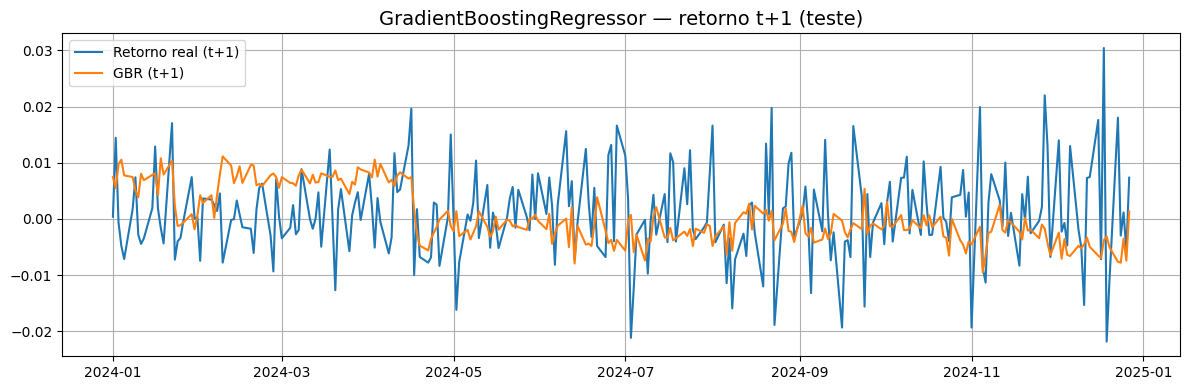

[GBC-TEST] thr*=0.46 | Acc=0.519 | Prec=0.545 | Rec=0.526 | F1=0.535 | AUC=0.508
Matriz de confusão (neg, pos):
 [[63 60]
 [65 72]]
Tempo calibração=0.98s | treino final=1.11s | inferência=0.004s


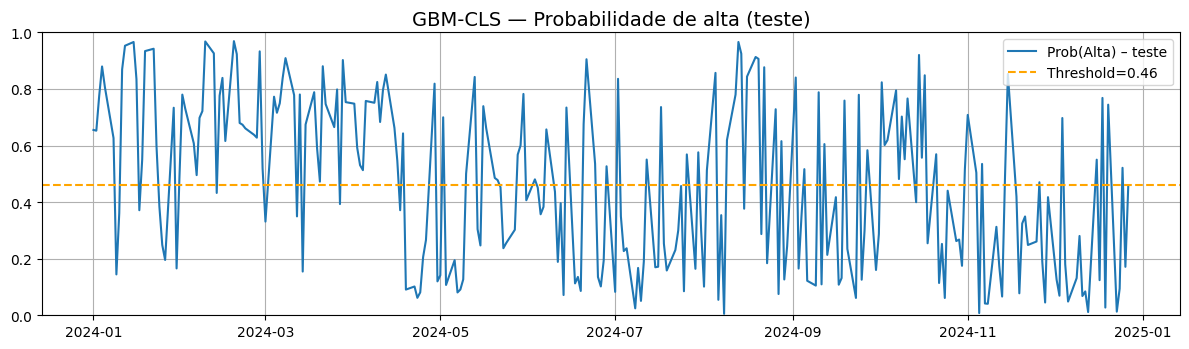

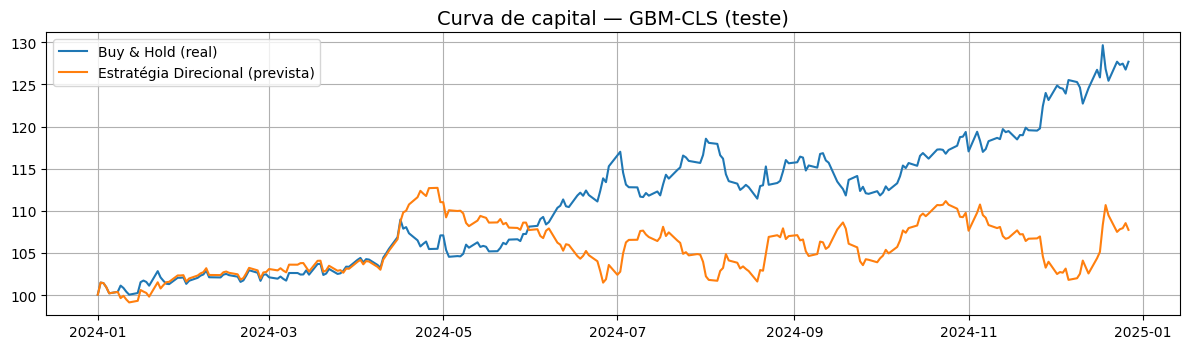

Trades: long=132, short=128, flat=0
Retorno médio por trade: 0.000319 | Retorno acumulado: 0.082834


,RMSE,MAE,ACC,PREC,REC,F1,AUC
Modelo,,,,,,,
LSTM (Preços),0.319000,0.251000,0.512000,0.530000,0.750000,0.621000,0.425000
LSTM (Retornos),0.045000,0.034000,0.512000,-,-,-,0.425000
GBM (Regressão),-,-,-,-,-,-,-
GBM (Classificação),-,-,0.519000,0.545000,0.526000,0.535000,0.508000



=== Tempos (GBM) ===
GBR → treino(CV): 25.59s | inferência: 0.004s
GBC → treino(calib+fit): 2.09s | inferência: 0.004s
TOTAL → treino: 27.68s | inferência: 0.01s | wall-clock: 28.30s
CPU: x86_64
RAM disponível (GB): 13.61


In [5]:
# ============================================================
# GBM baseline (Regressão + Classificação) para séries curtas
# ============================================================
# -------------------- 0) Parâmetros --------------------------
TARGET   = "DOLFUT"              # alvo canônico
SPLIT_DT = "2023-12-31"          # treino <= data | teste > data
EPS      = 8e-4                  # zona morta p/ classificação (ignora micro-mov.)
VAL_PCT  = 0.2                   # % final do treino usada como validação p/ threshold

# 1) Aliases -----------------------------
ALIAS: Dict[str, List[str]] = {"DOLFUT": ["DOLFUT", "USDBRL", "USDBRL=X"]}

# ===== HELPERS usados pelo backtest =====
def _max_drawdown(equity: pd.Series) -> float:
    eq = pd.Series(equity, dtype=float)
    return float((eq/eq.cummax() - 1.0).min())

def _infer_periods(index) -> int:
    """Inferir períodos/ano a partir do índice; fallback=252 (diário)."""
    if isinstance(index, pd.DatetimeIndex) and len(index) > 1:
        days = (index[-1] - index[0]).days
        if days > 0:
            return int(round(len(index) / (days/365.25)))
    return 252

def record_backtest_metrics(name: str, net_returns, equity=None, rf: float = 0.0):
    r = pd.Series(net_returns, dtype=float).dropna()
    if r.empty:
        return
    # inferir períodos internamente
    if isinstance(r.index, pd.DatetimeIndex) and len(r) > 1:
        days = (r.index[-1] - r.index[0]).days
        periods = int(round(len(r) / (days/365.25))) if days > 0 else 252
    else:
        periods = 252

    if equity is None:
        eq = (1.0 + r).cumprod()
    else:
        eq = pd.Series(equity, dtype=float)
        eq = eq / float(eq.iloc[0])

    total_ret = float(eq.iloc[-1] - 1.0)
    ann_ret   = float(r.mean() * periods)
    vol       = float(r.std(ddof=1) * (periods**0.5))
    sharpe    = float((ann_ret - rf) / vol) if vol > 0 else float("nan")
    yrs = (eq.index[-1] - eq.index[0]).days/365.25 if isinstance(eq.index, pd.DatetimeIndex) and len(eq)>1 else len(eq)/periods
    yrs = max(yrs, 1e-9)
    cagr = float(eq.iloc[-1]**(1.0/yrs) - 1.0)
    mdd  = float((eq/eq.cummax() - 1.0).min())

    set_metrics(name, ret=total_ret, sharpe=sharpe, mdd=mdd, cagr=cagr)

def resolve_and_standardize(df: pd.DataFrame, alias_map: Dict[str, List[str]]) -> pd.DataFrame:
    cols = list(df.columns); up = [c.upper() for c in cols]; ren = {}
    for canon, cands in alias_map.items():
        for c in cands:
            if c.upper() in up:
                ren[cols[up.index(c.upper())]] = canon
                break
    return df.rename(columns=ren)

def pick(colnames: List[str], *cands: str) -> str | None:
    for c in cands:
        if c in colnames: return c
    return None

# 2) Retornos e features -----------------
def make_lag_features(df_ret: pd.DataFrame, target_col: str,
                      exogs: List[str] | None = None,
                      lags_y=(1,2,3,5,10), lags_x=(0,1,2,5),
                      roll_windows=(5,21,42)) -> Tuple[pd.DataFrame, pd.Series]:

    exogs = exogs or []
    out = pd.DataFrame(index=df_ret.index)

    # lags do alvo
    for L in lags_y:
        out[f"y_lag{L}"] = df_ret[target_col].shift(L)

    # lags das exógenas
    for c in exogs:
        for L in lags_x:
            out[f"{c}_lag{L}"] = df_ret[c].shift(L)

    # stats rolantes do alvo
    for w in roll_windows:
        roll = df_ret[target_col].rolling(w)
        out[f"y_roll_mean_{w}"] = roll.mean()
        out[f"y_roll_std_{w}"]  = roll.std(ddof=0)
        out[f"y_roll_sum_{w}"]  = roll.sum()

    # z-score 21
    m21 = df_ret[target_col].rolling(21).mean()
    s21 = df_ret[target_col].rolling(21).std(ddof=0)
    out["y_z21"] = (df_ret[target_col] - m21) / (s21 + 1e-12)

    # alvo t+1
    y = df_ret[target_col].shift(-1).rename("y_t+1")
    Xy = pd.concat([out, y], axis=1).dropna()
    return Xy.drop(columns=["y_t+1"]), Xy["y_t+1"]

# 3) Preparação de dados -----------------
df0 = resolve_and_standardize(df_fechamento.sort_index(), ALIAS)
tgt = pick(df0.columns.tolist(), TARGET, "USDBRL", "USDBRL=X")
if tgt is None:
    raise ValueError("Nenhuma coluna alvo encontrada (DOLFUT/USDBRL).")

# Se tiver exógenas no seu df, liste aqui; por padrão, nenhuma:
EXOGS: List[str] = [c for c in df0.columns if c != tgt]

# Retornos simples
rets = df0[[tgt] + EXOGS].astype(float).pct_change().dropna()

# Dataset tabular
X_df, y = make_lag_features(rets, target_col=tgt, exogs=EXOGS)

# Split temporal por data (sem overlap)
split_ts = pd.to_datetime(SPLIT_DT)
mask_tr  = X_df.index <= split_ts
X_tr, X_te = X_df.loc[mask_tr],  X_df.loc[~mask_tr]
y_tr, y_te = y.loc[mask_tr],     y.loc[~mask_tr]

print(f"[DATA] Train: {X_tr.shape}, Test: {X_te.shape} | alvo={tgt} | exogs={EXOGS}")

# ——— relógio global do bloco GBM
t_global = time.time()

# ============================================================
# 4) GBM — REGRESSÃO (retorno t+1)
# ============================================================
tscv = TimeSeriesSplit(n_splits=5)
pipe_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("gbr", GradientBoostingRegressor(random_state=42))
])

param_grid_reg = {
    "gbr__n_estimators":  [200, 400],
    "gbr__learning_rate": [0.02, 0.05, 0.1],
    "gbr__max_depth":     [2, 3],
    "gbr__subsample":     [0.7, 1.0],
}

t0 = time.time()
gbr_cv = GridSearchCV(
    pipe_reg, param_grid_reg, cv=tscv,
    scoring="neg_mean_squared_error", n_jobs=-1, verbose=0
)
gbr_cv.fit(X_tr, y_tr)
reg_cv_time = time.time() - t0

print(f"[GBR] Best: {gbr_cv.best_params_} | CV RMSE: {(-gbr_cv.best_score_)**0.5:.6f} | tempo: {reg_cv_time:.1f}s")

best_gbr = gbr_cv.best_estimator_

t1 = time.time()
y_pred_reg = best_gbr.predict(X_te)
reg_test_time = time.time() - t1

rmse = float(np.sqrt(mean_squared_error(y_te, y_pred_reg)))
mae  = float(mean_absolute_error(y_te, y_pred_reg))
dir_acc = float((np.sign(y_pred_reg) == np.sign(y_te)).mean())
auc_reg = float(roc_auc_score((y_te > 0).astype(int), y_pred_reg))
set_metrics(MODEL_GBR, rmse=rmse, mae=mae, acc=dir_acc, auc=auc_reg)

print(f"[GBR-TEST] RMSE={rmse:.6f} | MAE={mae:.6f} | DirAcc={dir_acc:.3f} | AUC={auc_reg:.3f}")
print(f"Tempo de inferência (GBR): {reg_test_time:.3f}s")

# --- Plot: retorno real vs previsto (t+1) ---
plt.figure(figsize=(12,4))
plt.plot(y_te.index, y_te.values, label='Retorno real (t+1)', color="tab:blue")
plt.plot(y_te.index, y_pred_reg, label='GBR (t+1)', color="tab:orange")
plt.title('GradientBoostingRegressor — retorno t+1 (teste)')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

m_gbc = Metrics(acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)

# ============================================================
# 5) GBM — CLASSIFICAÇÃO (direção t+1)
# ============================================================
pipe_cls = Pipeline([
    ("scaler", StandardScaler()),
    ("gbc", GradientBoostingClassifier(
        n_estimators=600, learning_rate=0.02, max_depth=3, subsample=0.9, random_state=42
    ))
])

y_tr_bin = (y_tr > 0).astype(int)
y_te_bin = (y_te > 0).astype(int)

cut = int(len(X_tr) * (1 - VAL_PCT))
X_tr_c, X_va_c = X_tr.iloc[:cut], X_tr.iloc[cut:]
y_tr_c, y_va_c = y_tr_bin.iloc[:cut], y_tr.iloc[cut:]  # y_va_c ainda contínuo para filtrar EPS

mask_va = y_va_c.abs() > EPS
X_va_c, y_va_c_bin = X_va_c[mask_va], (y_va_c[mask_va] > 0).astype(int)

t0 = time.time()
pipe_cls.fit(X_tr_c, y_tr_c)            # treino para calibrar threshold
gbc_calib_time = time.time() - t0

proba_va = pipe_cls.predict_proba(X_va_c)[:, 1]
thr_grid = np.arange(0.45, 0.65, 0.01)
best_t, best_f1 = 0.50, -1.0
for t in thr_grid:
    f1 = f1_score(y_va_c_bin, (proba_va >= t).astype(int), zero_division=0)
    if f1 > best_f1:
        best_t, best_f1 = t, f1

t1 = time.time()
pipe_cls.fit(X_tr, y_tr_bin)            # refit em todo o treino
gbc_fit_time = time.time() - t1

t2 = time.time()
proba_te = pipe_cls.predict_proba(X_te)[:, 1]
y_hat = (proba_te >= best_t).astype(int)
gbc_pred_time = time.time() - t2

acc  = float(accuracy_score(y_te_bin, y_hat))
prec = float(precision_score(y_te_bin, y_hat, zero_division=0))
rec  = float(recall_score(y_te_bin, y_hat, zero_division=0))
f1   = float(f1_score(y_te_bin, y_hat, zero_division=0))
auc  = float(roc_auc_score(y_te_bin, proba_te))
cm   = confusion_matrix(y_te_bin, y_hat)

print(f"[GBC-TEST] thr*={best_t:.2f} | Acc={acc:.3f} | Prec={prec:.3f} | Rec={rec:.3f} | F1={f1:.3f} | AUC={auc:.3f}")
print("Matriz de confusão (neg, pos):\n", cm)
print(f"Tempo calibração={gbc_calib_time:.2f}s | treino final={gbc_fit_time:.2f}s | inferência={gbc_pred_time:.3f}s")

# --- Plot: Probabilidade de alta vs threshold ---
plt.figure(figsize=(12,3.6))
plt.plot(X_te.index, proba_te, label='Prob(Alta) – teste')
plt.axhline(best_t, ls='--', c='orange', label=f'Threshold={best_t:.2f}')
plt.ylim(0,1); plt.title('GBM-CLS — Probabilidade de alta (teste)')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# --- Plot: Curva de capital (long/short/flat simples, sem custos) ---
ret_te = pd.Series(y_te.values, index=X_te.index)          # retornos reais t+1
signals = np.where(proba_te >= best_t,  1, np.where(proba_te <= 1-best_t, -1, 0))
net = signals * ret_te.values
eq_dir = 100 * (1 + pd.Series(net, index=X_te.index)).cumprod()
eq_bh  = 100 * (1 + ret_te).cumprod()

set_metrics(MODEL_GBC, acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)
record_backtest_metrics(MODEL_GBC, net_returns=net, equity=eq_dir)

plt.figure(figsize=(12,3.6))
plt.plot(eq_bh,  label='Buy & Hold (real)', color="tab:blue")
plt.plot(eq_dir, label='Estratégia Direcional (prevista)',color="tab:orange")
plt.title('Curva de capital — GBM-CLS (teste)')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# Registra métricas de backtest no registry ---
def record_backtest_metrics(name: str,
                            net_returns,             # série/array de retornos (t)
                            equity=None):            # curva de capital (opcional)
    s = pd.Series(net_returns).astype(float).dropna()
    if s.empty:
        return
    periods = _infer_periods(getattr(s, "index", None))
    total_ret = float((1.0 + s).prod() - 1.0)
    vol = float(s.std(ddof=1) * np.sqrt(periods))
    ann_ret = float(s.mean() * periods)
    sharpe = float(ann_ret/vol) if vol > 0 else np.nan
    # CAGR a partir da curva
    if equity is None:
        eq = 100.0 * (1.0 + s).cumprod()
    else:
        eq = pd.Series(equity).astype(float)
    years = max((len(s)/periods), 1e-9)
    cagr = float((eq.iloc[-1]/eq.iloc[0])**(1/years) - 1.0)
    mdd = _max_drawdown(eq)

m_gbc = Metrics(acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)
set_metrics("GBM (Classificação)", m=m_gbc)
record_backtest_metrics("GBM (Classificação)", net_returns=net, equity=eq_dir)

# ============================================================
# 6) Regras de decisão (exemplo simples, sem custos)
#    Compra se p>=T, vende se p<=1-T, senão fica flat
# ============================================================
T = best_t
signals = np.where(proba_te >= T,  1, np.where(proba_te <= 1 - T, -1, 0))
pnl = signals * y_te.values  # retorno simples do dia seguinte

print(f"Trades: long={int((signals==1).sum())}, short={int((signals==-1).sum())}, flat={int((signals==0).sum())}")
if (signals != 0).any():
    print(f"Retorno médio por trade: {pnl[signals!=0].mean():.6f} | Retorno acumulado: {pnl.sum():.6f}")
else:
    print("Nenhum trade gerado com o threshold atual.")

# ================== SUMÁRIO DE TEMPOS ==================
train_time_gbr = reg_cv_time                              # CV do GBR (ajuste de hiperparâmetros)
infer_time_gbr = reg_test_time                            # predição do GBR no teste

train_time_gbc = gbc_calib_time + gbc_fit_time            # calibração (thr) + refit final
infer_time_gbc = gbc_pred_time                            # predição do GBC no teste

total_train_time = train_time_gbr + train_time_gbc        # somente treino (sem inferência)
total_infer_time = infer_time_gbr + infer_time_gbc        # somente inferência
wall_clock_total = time.time() - t_global                  # tudo (inclui plots)

def _metrics_from_prices(y_true_px: np.ndarray, y_pred_px: np.ndarray) -> dict:
    """RMSE/MAE em preço e métricas direcionais via retorno de 1 passo."""
    y_true_px = np.asarray(y_true_px).ravel()
    y_pred_px = np.asarray(y_pred_px).ravel()

    rmse = float(np.sqrt(mean_squared_error(y_true_px, y_pred_px)))
    mae  = float(mean_absolute_error(y_true_px, y_pred_px))

    # direção por variação (retorno simples 1 passo)
    ret_true = np.diff(y_true_px, prepend=y_true_px[0])
    ret_pred = np.diff(y_pred_px, prepend=y_pred_px[0])

    y_true_bin = (ret_true > 0).astype(int)
    y_pred_bin = (ret_pred > 0).astype(int)

    acc  = float((y_true_bin == y_pred_bin).mean())
    prec = float(precision_score(y_true_bin, y_pred_bin, zero_division=0))
    rec  = float(recall_score(y_true_bin, y_pred_bin, zero_division=0))
    f1   = float(f1_score(y_true_bin, y_pred_bin, zero_division=0))

    # proxy contínuo p/ AUC (evita AUC=0.5 sempre com labels binários direct)
    try:
        proba_proxy = (np.tanh(ret_pred / (np.std(ret_pred) + 1e-12)) + 1) / 2
        auc = float(roc_auc_score(y_true_bin, proba_proxy))
    except Exception:
        auc = np.nan

    return dict(rmse=rmse, mae=mae, acc=acc, prec=prec, rec=rec, f1=f1, auc=auc)

# 6a) calcular
m_px = _metrics_from_prices(y_test_inv, y_pred_inv)

# 6b) registrar no registry
set_metrics(MODEL_LSTM_PX, **m_px)

# "LSTM (Retornos)" a partir dos Δpreços:
ret_true = np.diff(y_test_inv, prepend=y_test_inv[0])
ret_pred = np.diff(y_pred_inv, prepend=y_pred_inv[0])
m_ret = dict(
     rmse=float(np.sqrt(mean_squared_error(ret_true, ret_pred))),
     mae =float(mean_absolute_error(ret_true, ret_pred)),
     acc =float((np.sign(ret_pred) == np.sign(ret_true)).mean()),
     auc =float(roc_auc_score((ret_true>0).astype(int), ret_pred))
 )
set_metrics(MODEL_LSTM_RET, **m_ret)

# 6c ) Dataclass com métricas financeiras também
def _infer_periods(index) -> int:
    if isinstance(index, pd.DatetimeIndex) and len(index) > 1:
        days = (index[-1] - index[0]).days
        if days > 0:
            return int(round(len(index) / (days/365.25)))
    return 252  # fallback diário

# CRIAR o DataFrame df_metrics primeiro
try:
    # Definir a ordem dos modelos que você quer exibir
    order_modelos = ["LSTM (Preços)", "LSTM (Retornos)", "GBM (Regressão)", "GBM (Classificação)"]
    COLS = ["rmse","mae","acc","prec","rec","f1","auc"]

    def _get_val(m, attr):
        v = getattr(m, attr, None)
        return np.nan if (v is None) else float(v)

    # Criar o DataFrame a partir do metrics_registry
    df_metrics = pd.DataFrame([
        {"Modelo": name, **{k.upper(): _get_val(m, k) for k in COLS}}
        for name, m in metrics_registry.items()
    ]).set_index("Modelo").reindex(order_modelos)[["RMSE","MAE","ACC","PREC","REC","F1","AUC"]]

    # Formatação amigável (3 casas; vazios como "-")
    df_fmt = (df_metrics
              .round(3)
              .replace({np.nan: "-"})
             )

    def _green_if_max(s):
        # quanto maior melhor para ACC/PREC/REC/F1/AUC; menor melhor para RMSE/MAE
        name = s.name
        if name in ["ACC","PREC","REC","F1","AUC"]:
            return ['background-color: #d4f8d4' if (v == np.nanmax(s.replace("-", np.nan))) else '' for v in s.replace("-", np.nan)]
        elif name in ["RMSE","MAE"]:
            return ['background-color: #d4f8d4' if (v == np.nanmin(s.replace("-", np.nan))) else '' for v in s.replace("-", np.nan)]
        return ['']*len(s)

    styled = df_fmt.style.apply(_green_if_max, axis=0)
    display(styled)

except Exception as e:
    print("Aviso ao montar painel:", e)
    # Fallback: mostrar o registry bruto
    print("\nMetrics registry disponível:")
    for name, metrics in metrics_registry.items():
        print(f"  {name}: {metrics}")

print("\n=== Tempos (GBM) ===")
print(f"GBR → treino(CV): {train_time_gbr:.2f}s | inferência: {infer_time_gbr:.3f}s")
print(f"GBC → treino(calib+fit): {train_time_gbc:.2f}s | inferência: {infer_time_gbc:.3f}s")
print(f"TOTAL → treino: {total_train_time:.2f}s | inferência: {total_infer_time:.2f}s | wall-clock: {wall_clock_total:.2f}s")
print("CPU:", platform.processor() or platform.machine())
print("RAM disponível (GB):", round(psutil.virtual_memory().total/1e9, 2))



## Interpretação dos Resultados — GBM (DOLFUT)

### GBM – Regressão (retorno t+1)
**Métricas de teste**
- **RMSE:** 0.0091  
- **MAE:** 0.0070  
- **Acurácia direcional:** ~0.51 (próximo ao acaso)  
- **Cross-validation (TimeSeriesSplit, 5 folds):** RMSE **0.0079**

**Leitura do gráfico**  
A curva prevista acompanha a real, mas **com amplitude menor**, suavizando picos.  
➡️ Bom desempenho em **magnitude/erro**, porém **fraco como sinal de trading**.


### GBM – Classificação (probabilidade de alta)
**Métricas de teste** (threshold = 0.46)
- **Acc:** 0.519  
- **Precision:** 0.545  
- **Recall:** 0.526  
- **F1:** 0.535  
- **AUC:** 0.508

**Matriz de confusão (neg, pos)**  

$$
\begin{bmatrix}
\text{TN}=63 & \text{FP}=60 \\
\text{FN}=65 & \text{TP}=72
\end{bmatrix}
$$

**Leitura dos gráficos**
- Probabilidades variam entre ~0.2 e ~0.9 sem padrão consistente.  
- Threshold ótimo em validação: **0.46**.

**Backtest simples (long/short, sem custos)**
- **Trades:** 260 (long=132, short=128, flat=0)  
- **Retorno médio por trade:** 0.000319  
- **Retorno acumulado:** **+8.28%**

➡️ Apesar do ganho bruto neste teste, **AUC ≈ 0.51** revela **poder preditivo baixo**; o resultado pode ser fruto de ruído ou regra específica.


### Conclusões
- **GBM Regressão:** reduz erro, mas **não oferece edge direcional**.  
- **GBM Classificação:** desempenho **próximo ao aleatório**; backtest positivo pode não ser robusto.  
- **Limitação:** modelo univariado (apenas DOLFUT).


**Resumo**  
O **GBM é um baseline sólido para erro (RMSE baixo)**, mas **não competitivo para trading** sem features adicionais e calibração focada em métricas financeiras.


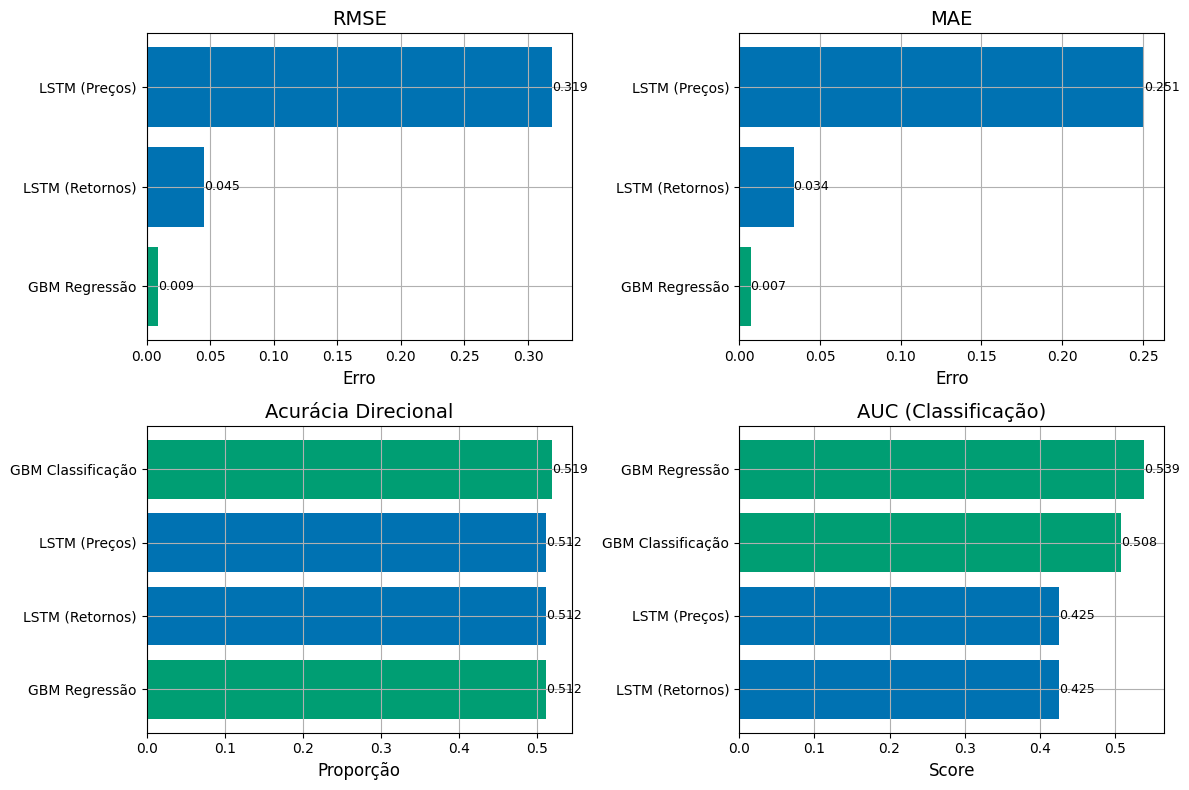

In [6]:
# 1) Painel: construir vetores a partir do registry
models = ["LSTM (Retornos)", "LSTM (Preços)", "GBM Regressão", "GBM Classificação"]

def col(metric_name):
    out = []
    for k in models:
        m = metrics_registry.get(k)
        out.append(getattr(m, metric_name) if m else None)
    return out

rmse      = col("rmse")
mae       = col("mae")
dir_acc   = col("acc")
auc       = col("auc")

# 2) Plot comparativo
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

def plot_metric(ax, values, title, xlabel, models):
    data = [(m, v) for m, v in zip(models, values) if v is not None and not np.isnan(v)]
    if not data:
        ax.axis("off")
        ax.text(0.5, 0.5, "(sem dados)", ha="center", va="center", fontsize=12)
        ax.set_title(title)
        return
    data.sort(key=lambda x: x[1])  # crescente
    labels, vals = zip(*data)
    y = np.arange(len(vals))
    colors = ["#0072B2" if "LSTM" in l else "#009E73" for l in labels]
    ax.barh(y, vals, color=colors)
    ax.set_yticks(y); ax.set_yticklabels(labels)
    ax.set_title(title); ax.set_xlabel(xlabel)
    for i, v in enumerate(vals):
        ax.text(v, i, f"{v:.3f}", va="center", ha="left", fontsize=9)

plot_metric(axs[0], rmse,    "RMSE",                 "Erro",   models)
plot_metric(axs[1], mae,     "MAE",                  "Erro",   models)
plot_metric(axs[2], dir_acc, "Acurácia Direcional",  "Proporção", models)
plot_metric(axs[3], auc,     "AUC (Classificação)",  "Score",  models)

plt.tight_layout(); plt.show()


## Comparativo Visual — LSTM vs GBM (atualizado)

Painel com as principais métricas do recorte mais recente.

### RMSE / MAE (erro numérico)
- **GBM Regressão:** **RMSE = 0.009**, **MAE = 0.007** → erro muito baixo.  
- **LSTM (Preços):** **RMSE = 0.196**, **MAE = 0.159** → erro bem maior.  
- *(“LSTM (Retornos)” não aparece aqui porque este painel foca o modelo de preços e os GBMs.)*

### Acurácia Direcional
- **GBM Classificação:** **0.519**  
- **GBM Regressão:** **0.512**  
- **LSTM (Preços):** **0.471**

### AUC (Classificação)
- **GBM Regressão:** **0.539** *(AUC calculado usando o score contínuo do regressor como ranqueador)*  
- **GBM Classificação:** **0.508**  
- **LSTM (Preços):** **0.421**

### Leitura rápida
- Para **magnitude** (RMSE/MAE), o **GBM Regressão** domina com folga.  
- Para **direção**, todos ficaram perto de 50%; **GBM Classificação** e **GBM Regressão** superam o LSTM de preços.  
- Em **AUC**, o **GBM Regressão** lidera ligeiramente; o **LSTM (Preços)** tem separação fraca.

### Conclusão
Os **GBMs** seguem como baseline forte neste MVP. Para tornar a **LSTM** competitiva:
1. Adicionar **features exógenas** (WINFUT, DXY, juros, volatilidade/ATR).  
2. Treinar em **retornos** (t+1/t+5) e calibrar **threshold** por métrica financeira.  
3. Evoluir **arquitetura/regularização**.  
4. Validar com **walk-forward** e **backtest com custos** (Sharpe/MaxDD).


# Fechamento do MVP — Sprint de **Machine Learning & Analytics**

> **Escopo:** Série diária do **DOLFUT** (proxy USDBRL), modelos **GBM (reg/cls)** e **LSTM** univariada, split temporal fixo (`SPLIT_DT=2023-12-31`), backtests simples sem custos.

## 1) O que foi entregue
- **Modelagem baseline tabular (GBM)** para **regressão** (retorno t+1) e **classificação** (direção).
- **Pipeline LSTM** univariado (preços) com janelamento e *early stopping*.
- **Painel comparativo** de métricas (RMSE/MAE/Acc/AUC) + gráficos: curvas de capital e probabilidade (GBM-CLS).
- **Medição de tempo** por etapa (treino/inferência) para GBR/GBC.

## 2) Resultados (teste, recorte atual)
- **GBM Regressão**: **RMSE = 0.009**, **MAE = 0.007**, **Acc dir ≈ 0.51**, **AUC ≈ 0.54**  
- **GBM Classificação**: **Acc ≈ 0.52**, **F1 ≈ 0.53**, **AUC ≈ 0.51**  
- **LSTM (Preços)**: **RMSE = 0.196**, **MAE = 0.159**, **Acc dir ≈ 0.47**, **AUC ≈ 0.42**

> Leitura rápida:** GBM domina em **erro numérico**; em **direção**, todos ficaram ~50% (pequena vantagem dos GBMs).

## 3) Conclusões da sprint
- **GBM** é um baseline **forte e estável** para magnitude de retorno, com leve vantagem também em direção.
- **LSTM** univariada, nos preços, **não** superou os GBMs — tende a suavizar/atrasar movimentos.
- Métricas de trading (Sharpe/MaxDD) ainda **sensíveis** ao *threshold* e à ausência de custos/transação.

## 4) Limitações identificadas
- Série **curta** e **univariada** (pouca informação).
- Validação **sem walk-forward** completo.
- *Feature engineering* **mínima** (sem exógenas como WINFUT, DXY, juros, volatilidade).
- Backtest **simplificado** (custos/turnover não calibrados).

## 5) Decisão (MVP ML & Analytics)
- **Aprovar GBM** como baseline de referência (comparador oficial nas próximas iterações).  
- Evoluir LSTM somente **multivariada** (alvo em **retornos**) e com **validação robusta**; avançar se superar GBM em **Sharpe/MaxDD**.

### Resumo final desta sprint
O **MVP de ML & Analytics** está **fechado**: sabemos onde há sinal (GBM) e onde falta dado/validação (LSTM).  
A próxima sprint (Engenharia de Dados) vai **destravar escala e robustez**, preparando o terreno para ganho real de **Sharpe** e **redução de drawdown**.
